# Introduction

# LHL_Midterm Project Overview

### Introduction

Midterm NYC neighborhood clustering & segmentation created by Lan Nguyen, Swati Goyal, Jason Cardinal

### Data Preparation
In the Data_Preparation folder contains all of the raw data as well as several checkpoints made as csv files.
Notebooks are titled as "data conversion.ipynb" with their respective data in file names to represent which data files were converted for use.
These notebooks contains the methods used to convert and clean the data.

The final data is the "nyc_data3.csv" file which contains:\
    -name (of NYC neighborhood)\
    -longitude\
    -latitude\
    -uber_count (how many times an uber service was called for in the neighborhood)\
    -avg_price (of restaurants in the neighborhood)\
    -adj_pop (population of neighborhood, adjusted from original data for compatibility to our data)\
    -median_daily_test_rate (of covid testing rate in neighborhood per 100000 people)\
    -avg_test_score (the average test score of elementary schools within the neighborhood)\
    -Median Sale Price - na has median (median house prices of neighborhood)\
    -pop_density (population density of neighborhood per sq. mile)

### Model Set Up
The model_set_up folder contains all notebooks used to attempt to model our algorithm.
For modeling, K-means clustering, hierarchical agglomerative clustering, and DBScan were all tried and tested to make a model.

The results of our testing in fitting a model proved that K-means clustering provides the best separation in creating clusters.

### Suggestion Tool
The Suggestion_Tool folder contains NYC_neighborhood_suggestion.ipynb, which is able to suggest an NYC neighborhood for one to live in based on certain factors and preferences. Details of parameters necessary to run the function are within the notebook preamble.

The folder also contains submission.csv, which is a csv file of the name of neighborhoods and the cluster to which they belong in based on our model. This is the final submission file.

# nyc_geo_dataframe

# Data Preparation

## nyc_geo_dataframe

Parse the json **nyc_geo.json** into the dataframe with the following columns:
- Borough
- Neighborhood
- Latitude
- Longitude

In [26]:
import numpy as np # library to handle data in a vectorized manner
import os
import ssl
import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pandas import json_normalize

#pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import certifi

import folium # map rendering library.


print(pd.__version__) 

1.3.5


In [27]:
with open('nyc_geo.json') as json_data:
    newyork_data=json.load(json_data)

1. Download and Explore Dataset:
Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.


In [28]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [29]:
newyork_data.keys()

dict_keys(['type', 'totalFeatures', 'features', 'crs', 'bbox'])

In [30]:
#all the relevant data is in the features key, which is basically a list of the neighborhoods.
neighborhoods_data = newyork_data['features']

In [31]:
#Take a look at the first item in this list.
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [32]:
# Parse the json nyc_geo.json into the dataframe - Tranform the data into a pandas dataframe

In [33]:
# creating an empty data frame and define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [34]:
#Take a look at the empty dataframe to confirm that the columns are as intended.
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [35]:
#Then loop through the data and fill the dataframe one row at a time.
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough']
    neighborhood_name = data['properties']['name']

    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]

    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [36]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [37]:
neighborhoods.shape

(306, 4)

In [38]:
#And make sure that the dataset has all 5 boroughs and 306 neighborhoods.
neighborhoods["Borough"].unique()

In [39]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]))

The dataframe has 5 boroughs and 306 neighborhoods.


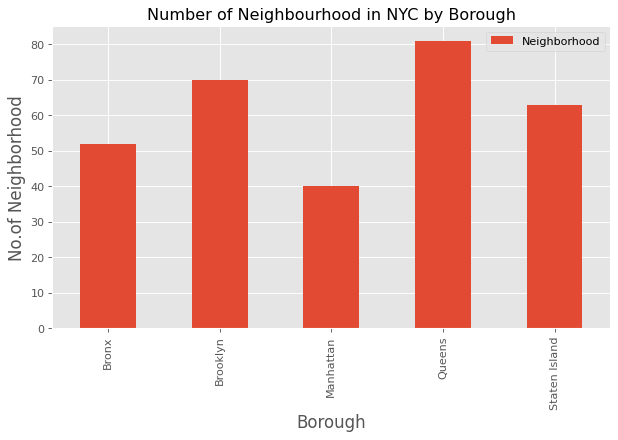

In [40]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 80)
# title
plt.title('Number of Neighbourhood in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
neighborhoods.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
plt.show()

Based on the data, Queens is the most densely populated borough in New York City with 80 neighborhoods

Use geopy library to get the latitude and longitude values of New York City.
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.

In [41]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Create a map of New York with neighborhoods superimposed on top.

In [42]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20L_NO_TOUCH%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20L_DISABLE_3D%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%3C/script%3E%0A%20%20%20%20%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css%22/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cstyle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23map_757c0ba4d14c434a8f74f1d8c4c6e1f4%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C/style%3E%0A%20%20%20%20%20%20%20%20%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_757c0ba4d14c434a8f74f1d8c4c6e1f4%22%20%3E%3C/div%3E%0A%20%20%20%20%20%20%20%20%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20map_757c0ba4d14c434a8f74f1d8c4c6e1f4%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22map_757c0ba4d14c434a8f74f1d8c4c6e1f4%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20center%3A%20%5B40.7127281%2C%20-74.0060152%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoom%3A%2010%2C%0A%20%20%20%20

In [43]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [44]:
#get the geographical coordinates of Manhattan.

address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [45]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)

map_manhattan

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20L_NO_TOUCH%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20L_DISABLE_3D%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%3C/script%3E%0A%20%20%20%20%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css%22/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cstyle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23map_2e626b8d09a64d09a379b0fc81dc7965%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C/style%3E%0A%20%20%20%20%20%20%20%20%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_2e626b8d09a64d09a379b0fc81dc7965%22%20%3E%3C/div%3E%0A%20%20%20%20%20%20%20%20%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20map_2e626b8d09a64d09a379b0fc81dc7965%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22map_2e626b8d09a64d09a379b0fc81dc7965%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20center%3A%20%5B40.7896239%2C%20-73.9598939%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoom%3A%2011%2C%0A%20%20%20%20

## Segmentation

In [46]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [47]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name,
                                                               neighborhood_latitude,
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [48]:
CLIENT_ID = 'WAPO1MICE4RWBRP1YHXQMHJF31TJWOL2UG2AEGOEG0NIBNQD'  # your Foursquare ID
CLIENT_SECRET = 'ZOZTX04KB42UYQKNKHVVZ1MRNAKTTHE0A53UCYMBSQ4XDY2H'  # your Foursquare Secret
FOURSQUARE_API_KEY = ('fsq3/rvVLNDgj9m+kwA9yevOArdaR1cx0vAdaipmNJXgePg=')

In [49]:
def foursquare_places_search(lat,lng,radius):    
    LIMIT = 50
    radius = 500
    url = 'https://api.foursquare.com/v3/places/search?ll={},{}&radius={}&limit={}'.format(lat, lng, radius, LIMIT)
    headers = {
        "Accept": "application/json",
        "Authorization": FOURSQUARE_API_KEY
    }
    response = requests.request("GET", url, headers=headers).json()
    return response   

In [50]:
results = foursquare_places_search(40.87655077879964,-73.91065965862981,500)
results

JSONDecodeError: JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [135]:
df_normalize = pd.json_normalize(results, record_path='results',errors='ignore')  
print(df_normalize)   

                      fsq_id  \
0   4b4429abf964a52037f225e3   
1   4b88e053f964a5208a1132e3   
2   4b4f7b65f964a5205a0827e3   
3   4b5357adf964a520319827e3   
4   4b9f030af964a520eb0f37e3   
5   4ed7956b8b81b2bf28adc714   
6   5af7b896012358002c42bf4a   
7   4b79cc46f964a520c5122fe3   
8   4e4e4517bd4101d0d7a67568   
9   55f81cd2498ee903149fcc64   
10  4b9c9c6af964a520b27236e3   
11  4dfe40df8877333e195b68fc   
12  4c852173dc018cfa2bc3e56c   
13  5631194e498e2de074de661c   
14  4b292e73f964a5207b9a24e3   
15  546d31ca498e561c698a0320   
16  4a0eb511f964a520ea751fe3   
17  4e4ce4debd413c4cc66d05d0   
18  4b9c9c43f964a520ac7236e3   
19  53319bb511d2ef06787f02b4   
20  4f22ff1c754a4ce2abb5175d   
21  4bc05fe4f8219c74ff79b110   
22  5012c967e889cf0567e9e2d4   

                                           categories  \
0   [{'id': 13064, 'name': 'Pizzeria', 'icon': {'p...   
1   [{'id': 17035, 'name': 'Drugstore', 'icon': {'...   
2   [{'id': 13334, 'name': 'Sandwich Restaurant', ...   
3  

In [142]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [140]:
# Let's create a function to repeat the same process to all the neighborhoods
def getNearbyVenues(borough,names, latitudes, longitudes, radius=50):
    
    venues_list=[]
    for borough, name, lat, lng in zip(borough, names, latitudes, longitudes):
       # print(name)
            
        # make the GET request
        results = foursquare_places_search(lat,lng, radius)
        
        venues = results['results']
        nearby_venues_1 = pd.json_normalize(venues) # flatten JSON
        if nearby_venues_1.empty==False:
            # filter columns
            filtered_columns = ['name', 'categories', 'geocodes.main.latitude', 'geocodes.main.longitude']
            nearby_venues_1 =nearby_venues_1.loc[:, filtered_columns]
            # filter the category for each row
            nearby_venues_1['categories'] = nearby_venues_1.apply(get_category_type, axis=1)
            # clean columns
            nearby_venues_1.columns = [col.split(".")[-1] for col in nearby_venues_1.columns]        
            # return only relevant information for each nearby venue
            venues_list.append([(
                borough,
                name, 
                lat, 
                lng, 
                v[0], 
                v[2], 
                v[3],  
                v[1]) for v in nearby_venues_1.to_numpy()])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
                  'Borough',           
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)    

In [141]:
nyc_venues = getNearbyVenues(
                borough = neighborhoods['Borough'],
                names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )
print(nyc_venues.shape)
nyc_venues.head()

JSONDecodeError: JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [110]:
# save dataframe as csv on local machine
nyc_venues.to_csv('nyc_venues_dataframe.csv', index=False)

NameError: NameError: name 'nyc_venues' is not defined

In [61]:
#check how many venues were returned for each neighborhood
nyc_venues.groupby('Neighborhood').count()

,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Allerton,40,40,40,40,40,40,40
Annadale,16,16,16,16,16,16,16
Arden Heights,9,9,9,9,9,9,7
Arlington,9,9,9,9,9,9,9
Arrochar,23,23,23,23,23,23,23
...,...,...,...,...,...,...,...
Woodhaven,31,31,31,31,31,31,30
Woodlawn,36,36,36,36,36,36,36
Woodrow,19,19,19,19,19,19,19


In [63]:

print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 433 uniques categories.


Analyze Each Neighborhood

In [65]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 

# move neighborhood column to the first column
column_list = nyc_onehot.columns.tolist()
column_number = int(column_list.index('Neighborhood'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]

nyc_onehot = nyc_onehot[column_list]

nyc_onehot.head()

,Neighborhood,ATM,Accounting and Bookkeeping Service,Advertising Agency,Afghan Restaurant,African Restaurant,Agriculture and Forestry Service,American Restaurant,Amusement Park,Antique Store,...,Warehouse / Wholesale Store,Water Sports,Waterfront,Welding Service,Whisky Bar,Wine Bar,Wine Store,Women's Store,Yoga Studio,Youth Organization
0,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
nyc_onehot.shape

(9054, 433)

In [67]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped

,Neighborhood,ATM,Accounting and Bookkeeping Service,Advertising Agency,Afghan Restaurant,African Restaurant,Agriculture and Forestry Service,American Restaurant,Amusement Park,Antique Store,...,Warehouse / Wholesale Store,Water Sports,Waterfront,Welding Service,Whisky Bar,Wine Bar,Wine Store,Women's Store,Yoga Studio,Youth Organization
0,Allerton,0.0,0.00,0.0,0.0,0.0,0.0,0.025000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,Annadale,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,Arden Heights,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,Arlington,0.0,0.00,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,Arrochar,0.0,0.00,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Woodhaven,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
297,Woodlawn,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
298,Woodrow,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
299,Woodside,0.0,0.02,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [68]:
nyc_grouped.shape

(301, 433)

In [70]:
#print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in nyc_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nyc_grouped[nyc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                         Venue  freq
0                    Drugstore  0.08
1                     Pizzeria  0.08
2           Chinese Restaurant  0.08
3  Grocery Store / Supermarket  0.08
4       Automotive Repair Shop  0.05


----Annadale----
                Venue  freq
0            Pizzeria  0.19
1          Bagel Shop  0.12
2  Italian Restaurant  0.06
3        Dance Studio  0.06
4          Nail Salon  0.06


----Arden Heights----
                                Venue  freq
0                          Playground  0.11
1                            Pizzeria  0.11
2                          Nail Salon  0.11
3                                Deli  0.11
4  Business and Professional Services  0.11


----Arlington----
                  Venue  freq
0        Scenic Lookout  0.11
1   American Restaurant  0.11
2           Coffee Shop  0.11
3  Fast Food Restaurant  0.11
4            Playground  0.11


----Arrochar----
                   Venue  freq
0               Pizzeria  0.13
1    

In [71]:
# put that into a pandas dataframe
# function to sort the venues in descending order.

def return_most_common_venues(row, num_top_places):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [72]:
# Create the new dataframe and display the top 10 places for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common venues'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common venues'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common venues,2nd Most Common venues,3rd Most Common venues,4th Most Common venues,5th Most Common venues,6th Most Common venues,7th Most Common venues,8th Most Common venues,9th Most Common venues,10th Most Common venues
0,Allerton,Drugstore,Pizzeria,Chinese Restaurant,Grocery Store / Supermarket,Automotive Repair Shop,Bakery,Department Store,Deli,Fast Food Restaurant,Bagel Shop
1,Annadale,Pizzeria,Bagel Shop,Italian Restaurant,Dance Studio,Nail Salon,Pub,Sushi Restaurant,Body Piercing Shop,Beach,Park
2,Arden Heights,Playground,Pizzeria,Nail Salon,Deli,Business and Professional Services,Drugstore,Swimming Pool,Other Great Outdoors,Organic Grocery,Organization
3,Arlington,Scenic Lookout,American Restaurant,Coffee Shop,Fast Food Restaurant,Playground,Deli,Landscaper and Gardener,Business and Professional Services,Storage Facility,Non-Profit Organization
4,Arrochar,Pizzeria,Nail Salon,Deli,Italian Restaurant,Sports and Recreation,Grocery Store / Supermarket,Fast Food Restaurant,Beach,Lounge,Bakery


Create a new dataframe and display the top 20 venues for each neighborhood

In [77]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [78]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Allerton,Drugstore,Pizzeria,Chinese Restaurant,Grocery Store / Supermarket,Automotive Repair Shop,Bakery,Department Store,Deli,Fast Food Restaurant,...,Barbershop,Health and Beauty Service,Hair Salon,Discount Store,Spanish Restaurant,Spa,Automotive Retail,Clothing Store,Playground,Dining and Drinking
1,Annadale,Pizzeria,Bagel Shop,Italian Restaurant,Dance Studio,Nail Salon,Pub,Sushi Restaurant,Body Piercing Shop,Beach,...,Restaurant,Bank,Diner,Plumber,Office Supply Store,Primary and Secondary School,Pakistani Restaurant,Painter,Other Great Outdoors,Organization
2,Arden Heights,Playground,Pizzeria,Nail Salon,Deli,Business and Professional Services,Drugstore,Swimming Pool,Other Great Outdoors,Organic Grocery,...,Pakistani Restaurant,Painter,Ophthalmologist,Park,Parking,Party Supply Store,Optometrist,ATM,Opera House,Office Supply Store
3,Arlington,Scenic Lookout,American Restaurant,Coffee Shop,Fast Food Restaurant,Playground,Deli,Landscaper and Gardener,Business and Professional Services,Storage Facility,...,Other Great Outdoors,Pediatrician,Pedestrian Plaza,Party Supply Store,Parking,New American Restaurant,Night Club,Park,Pakistani Restaurant,Painter
4,Arrochar,Pizzeria,Nail Salon,Deli,Italian Restaurant,Sports and Recreation,Grocery Store / Supermarket,Fast Food Restaurant,Beach,Lounge,...,Bagel Shop,Liquor Store,Cosmetics Store,Assisted Living Service,Bar,Restaurant,American Restaurant,Pediatrician,Pedestrian Plaza,Party Supply Store


## restaurant_conversion

In [6]:
data_restaurant= pd.read_csv("nyc_restaurant.csv")
data_restaurant.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,"Bronx,Wakefield",40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Ice Cream Parlor
1,Bronx,"Bronx,Wakefield",40.894705,-73.847201,Subway,40.890468,-73.849152,Fast Food Restaurant
2,Bronx,"Bronx,Wakefield",40.894705,-73.847201,Cooler Runnings Jamaican Restaurant,40.898083,-73.850259,American Restaurant
3,Bronx,"Bronx,Wakefield",40.894705,-73.847201,Central Deli,40.896728,-73.844387,Deli
4,Bronx,"Bronx,Wakefield",40.894705,-73.847201,Pitman Grocery& Deli,40.896744,-73.844398,Deli


In [7]:
# one hot restaurant encoding
data_onehot_restaurant = pd.get_dummies(data_restaurant[['Venue Category']], prefix="", prefix_sep="")

In [8]:
data_onehot_restaurant['Neighborhood'] = data_restaurant['Neighborhood'] 

In [12]:
base_columns  = list(data_onehot_restaurant.columns[-1:])
# move neighborhood column to the first column
fixed_columns = base_columns + list(data_onehot_restaurant.columns[:-1])
data_onehot_restaurant = data_onehot_restaurant[fixed_columns]

In [13]:
data_onehot_restaurant.shape

(10534, 156)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [14]:
base_columns

['Neighborhood']

In [15]:
data_grouped_restaurant = data_onehot_restaurant.groupby(base_columns).mean().reset_index()
data_grouped_restaurant

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Amusement Park,Arcade,Arepa Restaurant,Argentinian Restaurant,Arts and Entertainment,Asian Restaurant,...,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Xinjiang Restaurant
0,"Bronx,Allerton",0.0,0.0,0.023810,0.0,0.0,0.0,0.0,0.00,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1,"Bronx,Baychester",0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,"Bronx,Bedford Park",0.0,0.0,0.020000,0.0,0.0,0.0,0.0,0.00,0.040000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,"Bronx,Belmont",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.02,0.020000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,"Bronx,Bronxdale",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,"Staten Island,Travis",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
292,"Staten Island,West Brighton",0.0,0.0,0.021277,0.0,0.0,0.0,0.0,0.00,0.042553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
293,"Staten Island,Westerleigh",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
294,"Staten Island,Willowbrook",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


Let's print each neighborhood along with the top 5 most common restaurant

In [16]:
data_grouped_restaurant.groupby('Neighborhood').count()

,Afghan Restaurant,African Restaurant,American Restaurant,Amusement Park,Arcade,Arepa Restaurant,Argentinian Restaurant,Arts and Entertainment,Asian Restaurant,BBQ Joint,...,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Xinjiang Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,
"Bronx,Allerton",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Bronx,Baychester",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Bronx,Bedford Park",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Bronx,Belmont",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Bronx,Bronxdale",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Staten Island,Travis",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Staten Island,West Brighton",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Staten Island,Westerleigh",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [17]:
num_top_restaurant = 5

for hood in data_grouped_restaurant['Neighborhood']:
    print("----"+hood+"----")
    temp = data_grouped_restaurant[data_grouped_restaurant['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_restaurant))
    print('\n')

----Bronx,Allerton----
                  venue  freq
0              Pizzeria  0.21
1            Restaurant  0.14
2                  Deli  0.12
3  Fast Food Restaurant  0.10
4    Chinese Restaurant  0.07


----Bronx,Baychester----
                  venue  freq
0  Fast Food Restaurant  0.24
1              Pizzeria  0.18
2                  Deli  0.12
3    Chinese Restaurant  0.12
4            Restaurant  0.06


----Bronx,Bedford Park----
                 venue  freq
0                 Deli  0.20
1   Chinese Restaurant  0.16
2             Pizzeria  0.14
3   Mexican Restaurant  0.12
4  Fried Chicken Joint  0.08


----Bronx,Belmont----
                venue  freq
0            Pizzeria  0.20
1              Bakery  0.14
2                Deli  0.12
3  Italian Restaurant  0.10
4          Restaurant  0.08


----Bronx,Bronxdale----
                  venue  freq
0                  Deli  0.14
1              Pizzeria  0.12
2    Chinese Restaurant  0.12
3  Fast Food Restaurant  0.10
4  Caribbean Restau

In [18]:
# First, let's write a function to sort the venues in descending order.
def return_most_common_restaurant(row, num_top_restaurant):
    row_categories_restaurant = row.iloc[1:]
    row_categories_restaurant_sorted = row_categories_restaurant.sort_values(ascending=False)
    
    return row_categories_restaurant_sorted.index.values[0:num_top_restaurant]

Now let's create the new dataframe and display the top 10 venues restaurant for each neighborhood.

In [19]:
num_top_restaurant = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_restaurant):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_restaurant_sorted = pd.DataFrame(columns=columns,dtype=object)
neighborhoods_restaurant_sorted['Neighborhood'] = data_grouped_restaurant['Neighborhood']

for ind in np.arange(data_grouped_restaurant.shape[0]):
    neighborhoods_restaurant_sorted.iloc[ind, 1:] = return_most_common_restaurant(data_grouped_restaurant.iloc[ind, :], num_top_restaurant)

neighborhoods_restaurant_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bronx,Allerton",Pizzeria,Restaurant,Deli,Fast Food Restaurant,Chinese Restaurant,Bakery,Coffee Shop,Caribbean Restaurant,Asian Restaurant,Cocktail Bar
1,"Bronx,Baychester",Fast Food Restaurant,Pizzeria,Deli,Chinese Restaurant,Restaurant,BBQ Joint,Night Club,Bar,Italian Restaurant,American Restaurant
2,"Bronx,Bedford Park",Deli,Chinese Restaurant,Pizzeria,Mexican Restaurant,Fried Chicken Joint,Restaurant,Asian Restaurant,Burger Joint,Spanish Restaurant,Coffee Shop
3,"Bronx,Belmont",Pizzeria,Bakery,Deli,Italian Restaurant,Restaurant,Café,Fast Food Restaurant,BBQ Joint,Mexican Restaurant,Eastern European Restaurant
4,"Bronx,Bronxdale",Deli,Pizzeria,Chinese Restaurant,Fast Food Restaurant,Caribbean Restaurant,Diner,Indian Restaurant,Mexican Restaurant,Fried Chicken Joint,Burger Joint


In [20]:
data_restaurant.groupby('Borough')['Venue'].count()

In [21]:
data_restaurant_rename = data_restaurant.rename(columns={"Venue": "Restaurant",'Venue Latitude':'Restaurant Latitude','Venue Longitude':'Restaurant Longitude','Venue Category':'Restaurant Category'})

In [22]:
data_restaurant_rename.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Restaurant,Restaurant Latitude,Restaurant Longitude,Restaurant Category
0,Bronx,"Bronx,Wakefield",40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Ice Cream Parlor
1,Bronx,"Bronx,Wakefield",40.894705,-73.847201,Subway,40.890468,-73.849152,Fast Food Restaurant
2,Bronx,"Bronx,Wakefield",40.894705,-73.847201,Cooler Runnings Jamaican Restaurant,40.898083,-73.850259,American Restaurant
3,Bronx,"Bronx,Wakefield",40.894705,-73.847201,Central Deli,40.896728,-73.844387,Deli
4,Bronx,"Bronx,Wakefield",40.894705,-73.847201,Pitman Grocery& Deli,40.896744,-73.844398,Deli


Restaurant quantity in each borough

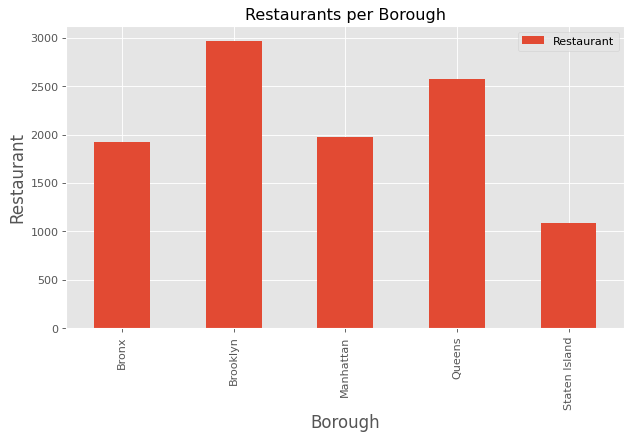

In [23]:

plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 80)
# title
plt.title('Restaurants per Borough')
#On x-axis
plt.xlabel('Restaurant', fontsize = 15)
#On y-axis
plt.ylabel('Restaurant', fontsize=15)
#giving a bar plot
data_restaurant_rename.groupby('Borough')['Restaurant'].count().plot(kind='bar')
#legend
plt.legend()
plt.show()

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


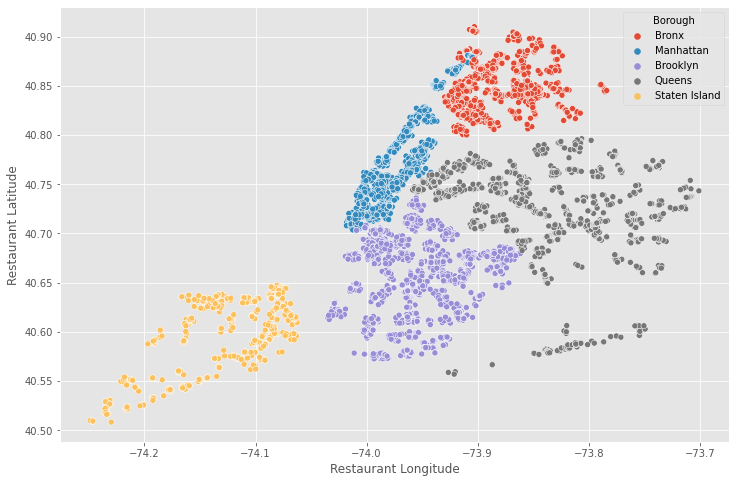

In [24]:
plot_dims=(12,8)
plt.figure(figsize=plot_dims)
sns.scatterplot(data_restaurant_rename['Restaurant Longitude'],data_restaurant_rename['Restaurant Latitude'],hue=data_restaurant_rename['Borough'])
plt.ioff()

In [1]:
# required libraries
import json
import pandas as pd

In [2]:
# open and load json
nycd = open('nyc_geo.json')
nyc_geo = json.load(nycd)

In [3]:
# check json keys
nyc_geo.keys()

dict_keys(['type', 'totalFeatures', 'features', 'crs', 'bbox'])

In [4]:
# create longitude list to append to dictionary
long_list = []
for i in nyc_geo['features']:
    long_list.append(i['geometry']['coordinates'][0])

In [5]:
# create latitude list to append to dictionary
lat_list = []
for i in nyc_geo['features']:
    lat_list.append(i['geometry']['coordinates'][1])

In [6]:
# create name list to append to dictionary
name_list = []
for i in nyc_geo['features']:
    name_list.append(i['properties']['name'])

In [7]:
# instantiate empty dictionary
nyc_dict = {}

In [8]:
# append relevant data to dictionary
nyc_dict['name'] = name_list
nyc_dict['longitude'] = long_list
nyc_dict['latitude'] = lat_list

In [9]:
# convert dictionary into dataframe
df_nyc = pd.DataFrame.from_dict(nyc_dict)

In [10]:
df_nyc

,name,longitude,latitude
0,Wakefield,-73.847201,40.894705
1,Co-op City,-73.829939,40.874294
2,Eastchester,-73.827806,40.887556
3,Fieldston,-73.905643,40.895437
4,Riverdale,-73.912585,40.890834
...,...,...,...
301,Hudson Yards,-74.000111,40.756658
302,Hammels,-73.805530,40.587338
303,Bayswater,-73.765968,40.611322
304,Queensbridge,-73.945631,40.756091


In [12]:
# save dataframe as csv on local machine
df_nyc.to_csv('nyc_geo_dataframe.csv', index=False)

In [13]:
df_nyc.loc[50]

# median_house_prices

## median_house_price

In [12]:
# import pandas
import pandas as pd
# Import train_test_split function
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

#import numpy
import numpy as np

import pandas as pd

#to calculate means
import statistics

import sklearn

## Import House Sale Price Data + Data Cleaning

In [13]:
#Importing the Dataset
df_data=pd.read_csv('nyc-rolling-sales.csv')
df_data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [15]:
# Data Wrangling 
df_data = df_data.reset_index(drop = True)
df_data = df_data[df_data['SALE PRICE'] != ' -  ']
df_data = df_data.reset_index(drop = True)
df_data['SALE PRICE'] = df_data['SALE PRICE'].astype('int64')
df_data = df_data[['NEIGHBORHOOD','SALE PRICE']]
df_data.head()

,NEIGHBORHOOD,SALE PRICE
0,ALPHABET CITY,6625000
1,ALPHABET CITY,3936272
2,ALPHABET CITY,8000000
3,ALPHABET CITY,3192840
4,ALPHABET CITY,16232000


In [16]:
#The average house sale price for each neighborhood in New York City!
df_data_grouped = df_data.groupby('NEIGHBORHOOD').mean().reset_index()
df_data_grouped.head()

,NEIGHBORHOOD,SALE PRICE
0,AIRPORT LA GUARDIA,598787.143
1,ALPHABET CITY,2600240.926
2,ANNADALE,628046.586
3,ARDEN HEIGHTS,394956.494
4,ARROCHAR,570045.935


Save data to csv

In [68]:
df_data_grouped.to_csv('df_data_grouped.csv', index=False)

# nyc_data_conversion

## nyc_data_conversion

In [51]:
# import libraries
import pandas as pd

In [52]:
# read covid csv data
covid = pd.read_csv('last7days-by-modzcta.csv')

In [53]:
covid

,modzcta,modzcta_name,label,lat,lon,percentpositivity_7day,people_tested,people_positive,median_daily_test_rate,adequately_tested,daterange
0,10001,Chelsea/NoMad/West Chelsea,"10001, 10118",40.750693,-73.997137,0.46,658,3,369.4,Yes,June 19-June 25
1,10002,Chinatown/Lower East Side,10002,40.715781,-73.986176,0.25,1212,3,204.5,No,June 19-June 25
2,10003,East Village/Gramercy/Greenwich Village,10003,40.731825,-73.989164,0.29,1051,3,331.6,Yes,June 19-June 25
3,10004,Financial District,10004,40.703675,-74.013106,0.00,79,0,471.0,Yes,June 19-June 25
4,10005,Financial District,10005,40.706092,-74.008861,0.37,271,1,536.7,Yes,June 19-June 25
...,...,...,...,...,...,...,...,...,...,...,...
172,11691,Edgemere/Far Rockaway,11691,40.601330,-73.761357,0.49,1228,6,201.9,No,June 19-June 25
173,11692,Arverne/Edgemere,11692,40.592794,-73.792203,0.53,377,2,242.5,No,June 19-June 25
174,11693,Arverne/Broad Channel,11693,40.603699,-73.821926,0.41,242,1,205.2,No,June 19-June 25
175,11694,Belle Harbor-Neponsit/Rockaway Park,11694,40.577599,-73.844553,0.47,423,2,192.5,No,June 19-June 25


In [54]:
# filter out necessary covid data
nyc_cov = covid[['modzcta_name', 'median_daily_test_rate']]

In [55]:
# rename covid data columns for consistency
nyc_cov.rename(columns={'modzcta_name':'name'}, inplace=True)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
nyc_cov

,name,median_daily_test_rate
0,Chelsea/NoMad/West Chelsea,369.4
1,Chinatown/Lower East Side,204.5
2,East Village/Gramercy/Greenwich Village,331.6
3,Financial District,471.0
4,Financial District,536.7
...,...,...
172,Edgemere/Far Rockaway,201.9
173,Arverne/Edgemere,242.5
174,Arverne/Broad Channel,205.2
175,Belle Harbor-Neponsit/Rockaway Park,192.5


In [25]:
# double explode method to get rid of / and - in names to split aggregated neighborhoods
nyc_cov['name'] = nyc_cov['name'].str.split('/')

<ipython-input-25-1076ab5503c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_cov['name'] = nyc_cov['name'].str.split('/')


In [26]:
nyc_cov1 = nyc_cov.explode('name')

In [27]:
nyc_cov1['name'] = nyc_cov1['name'].str.split('-')

In [28]:
nyc_cov2 = nyc_cov1.explode('name')

In [29]:
nyc_cov2.sort_values(by='name', inplace=True)

In [30]:
nyc_cov3 = nyc_cov2.groupby(by='name', as_index=False).sum()

In [31]:
# function to fully print entire dataframe for visual
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [32]:
print_full(nyc_cov3)

                           name  median_daily_test_rate
0                       Airport                   602.7
1                      Allerton                   511.5
2                 Alphabet City                   246.7
3                      Annadale                   263.7
4                      Arrochar                   317.3
5                       Arverne                   447.7
6               Astoria (North)                   666.2
7               Astoria (South)                   989.1
8                    Auburndale                   380.3
9                    Bath Beach                   388.2
10            Battery Park City                   830.8
11                    Bay Ridge                   285.9
12                   Baychester                   261.6
13              Bayside (North)                   428.8
14              Bayside (South)                   330.5
15                      Bedford                  1179.1
16                 Belle Harbor                 

In [33]:
# manually update all discrepancies by manually cross-referencing between uber data names and nyc_geo data names
nyc_cov3.at[223, 'name'] = 'Williamsburg'

In [34]:
# remove columns that do not exist in original nyc_geo data
indexname = nyc_cov3[nyc_cov3['name'] == 'West Harlem'].index
nyc_cov3.drop(indexname, inplace=True)

In [35]:
# grouping duplicate neighborhoods and summing the median daily test rates
# this is because some of the neighborhoods in the covid data were separate but were considered as one neighborhood in our original nyc_geo data
nyc_cov4 = nyc_cov3.groupby(by='name', as_index=False).sum()

In [36]:
nyc_cov4

,name,median_daily_test_rate
0,Airport,602.7
1,Allerton,511.5
2,Alphabet City,246.7
3,Annadale,263.7
4,Arrochar,317.3
...,...,...
225,Woodlawn,260.1
226,Woodrow,297.5
227,Woodside,243.9
228,Yorkville,928.3


In [37]:
# read nyc_upp data
nyc_upp = pd.read_csv('nyc_upp_data.csv')

In [38]:
# merge covid data to nyc_upp data
nyc_uppc = nyc_upp.merge(nyc_cov4, how='outer', on='name')

In [39]:
# about one-third of our data for covid is null
# this may be due to neighborhood naming differences between data sets
# could also be due to lack of recording data in some neighborhoods
nyc_uppc.isnull().sum()

In [40]:
nyc_cov4['median_daily_test_rate'].mean()

455.4495652173913

In [41]:
# choosing to fill na covid values with the mean of covid values
nyc_uppc.fillna(value=482.5, inplace=True)

In [42]:
nyc_uppc.isnull().sum()

In [49]:
# read ela scores data
ela = pd.read_csv('ELA_Scores.csv')

In [50]:
# filter out necessary ela columns
ela = ela[['name', 'avg_test_score']]

In [51]:
# dropping duplicates in ela data 
ela.drop_duplicates(subset='name', inplace=True, keep='first')

In [52]:
# merge ela data to create completed dataset
nyc_data = nyc_uppc.merge(ela, how='left', on='name')

In [53]:
# save completed dataset as nyc_data.csv
nyc_data.to_csv('nyc_data.csv', index=False)

# population_data_conversion

## population_data_conversion

In [54]:
# import libraries
import pandas as pd

In [55]:
# read csv as dataframe
nyc_pop = pd.read_csv('pop_dataframe_old_names.csv')

In [61]:
nyc_pop

,name,pop
0,Claremont-Bathgate,28149
1,Eastchester-Edenwald-Baychester,35422
2,Bedford Park-Fordham North,55329
3,Belmont,25967
4,Bronxdale,34309
...,...,...
385,Stapleton-Rosebank,26453
386,New Dorp-Midland Beach,21896
387,Arden Heights,25238
388,Great Kills,40720


In [284]:
# format dataframe for compatibility to nyc_uber_price data
nyc_pop.drop(columns='Unnamed: 0', inplace=True)

KeyError: KeyError: "['Unnamed: 0'] not found in axis"

In [63]:
nyc_pop.rename(columns={'neighbourhood':'name'}, inplace=True)

In [64]:
nyc_pop

,name,pop
0,Claremont-Bathgate,28149
1,Eastchester-Edenwald-Baychester,35422
2,Bedford Park-Fordham North,55329
3,Belmont,25967
4,Bronxdale,34309
...,...,...
385,Stapleton-Rosebank,26453
386,New Dorp-Midland Beach,21896
387,Arden Heights,25238
388,Great Kills,40720


In [65]:
# use explode method to separate neighborhoods into individual rows
nyc_pop['name'] = nyc_pop['name'].str.split('-')

In [66]:
nyc_pop1 = nyc_pop.explode('name')

In [67]:
pop_count = nyc_pop1.groupby(by='pop').count()

In [68]:
# create new formatted dataframe that will contain adjusted population based on number of splits made by explode method
# this is now assuming even distribution between splits
nyc_pop2 = nyc_pop1.merge(pop_count, how='outer', on='pop')

In [69]:
nyc_pop2.rename(columns={'name_x':'name', 'name_y':'pop_count'}, inplace=True)

In [70]:
nyc_pop2['adj_pop'] = nyc_pop2['pop'] / 2

In [71]:
nyc_pop2['adj_pop'] = nyc_pop2['adj_pop'].round()

In [72]:
nyc_pop2

,name,pop,pop_count,adj_pop
0,Claremont,28149,2,14074.0
1,Bathgate,28149,2,14074.0
2,Eastchester,35422,3,17711.0
3,Edenwald,35422,3,17711.0
4,Baychester,35422,3,17711.0
...,...,...,...,...
641,Rosebank,26453,2,13226.0
642,New Dorp,21896,2,10948.0
643,Midland Beach,21896,2,10948.0
644,Arden Heights,25238,1,12619.0


In [74]:
nyc_pop3 = nyc_pop2[['name', 'adj_pop']]

In [75]:
nyc_pop3.sort_values(by='name', inplace=True)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [76]:
# function to fully print entire dataframe for visual
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [77]:
print_full(nyc_pop3)

                                 name  adj_pop
270                           Airport      0.0
271                           Airport      0.0
361                          Allerton  14452.0
32                           Allerton  14255.0
602                          Annadale  13885.0
280                          Annadale  13188.0
644                     Arden Heights  12619.0
322                     Arden Heights  12498.0
295                         Arlington  13978.0
617                         Arlington  15737.0
621                          Arrochar   8040.0
299                          Arrochar   7619.0
533                           Arverne  18442.0
203                           Arverne  15822.0
266                           Astoria  44561.0
594                           Astoria  39396.0
246                        Auburndale  10100.0
575                        Auburndale   9998.0
597                      Baisley Park  17302.0
269                      Baisley Park  17864.0
80           

In [78]:
# manually update all discrepancies by manually cross-referencing between uber data names and nyc_geo data names
nyc_upp.at[265, 'adj_pop'] = 7031

In [79]:
# remove columns that do not exist in original nyc_geo data
indexname = nyc_pop3[nyc_pop3['name'] == 'Westchester'].index
nyc_pop3.drop(indexname, inplace=True)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [82]:
# aggregate and sum by name
nyc_pop3 = nyc_pop3.groupby(by='name').sum()

In [80]:
nyc_pop3.reset_index(inplace=True)

In [81]:
nyc_up = pd.read_csv('nyc_uber_price.csv')

In [82]:
# merge nyc_uber_price data with population data
nyc_upp = nyc_up.merge(nyc_pop3, how='outer', on='name')

In [83]:
# check for null values
nyc_upp.isnull().sum()

In [84]:
# save nyc_uber_price_pop data to csv
nyc_upp.to_csv('nyc_upp_data.csv', index=False)

# population_density_conversion

## population_density_conversion

In [85]:
import pandas as pd

In [86]:
pop_den = pd.read_csv('Internet_Master_Plan__Adoption_and_Infrastructure_Data_by_Neighborhood (1).csv')

In [87]:
pop_den = pop_den[['Neighborhood Tabulation Area Name (NTA NAME)', 'Population Density (per Sq. Mi.)']]

In [88]:
pop_den.rename(columns={'Neighborhood Tabulation Area Name (NTA NAME)':'name', 'Population Density (per Sq. Mi.)':'pop_density'}, inplace=True)

In [89]:
pop_den['name'] = pop_den['name'].str.split('-')

In [90]:
pop_den1 = pop_den.explode('name')

In [91]:
pop_den1

,name,pop_density
0,Brooklyn Heights,65994.44
0,Cobble Hill,65994.44
1,Sheepshead Bay,28707.93
1,Gerritsen Beach,28707.93
1,Manhattan Beach,28707.93
...,...,...
193,Great Kills,12998.13
194,park,0.00
194,cemetery,0.00
194,etc,0.00


In [92]:
pop_den1.sort_values(by='name', inplace=True)

In [93]:
pop_den1.reset_index(inplace=True, level=0)

In [94]:
pop_den1.drop(columns=['level_0', 'index'], inplace=True)

KeyError: KeyError: "['level_0'] not found in axis"

In [109]:
# function to fully print entire dataframe for visual
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [110]:
print_full(pop_den1)

                                 name  pop_density
0                             Airport         0.00
1                            Allerton     27278.07
2                            Annadale      5889.53
3                       Arden Heights     14854.70
4                           Arlington     10275.86
5                            Arrochar     11168.03
6                             Arverne     19218.47
7                             Astoria     52548.94
8                          Auburndale     16455.28
9                        Baisley Park     23955.06
10                         Bath Beach     45378.38
11                           Bathgate     59644.07
12                  Battery Park City     68332.35
13                          Bay Ridge     32735.27
14                        Bay Terrace     13246.99
15                         Baychester     26643.75
16                            Bayside     14730.34
17                      Bayside Hills     14730.34
18                          Bay

In [111]:
# manually update all discrepancies by manually cross-referencing between uber data names and nyc_geo data names
pop_den1.at[283, 'name'] = 'Westchester Square'

In [112]:
# remove columns that do not exist in original nyc_geo data
indexname = pop_den1[pop_den1['name'] == 'op City'].index
pop_den1.drop(indexname, inplace=True)

In [113]:
# manually update all discrepancies by manually cross-referencing between uber data names and nyc_geo data names
pop_den1.at[29, 'pop_density'] = 14730.34

In [114]:
pop_den2 = pop_den1.groupby(by='name', as_index=False).mean()

In [115]:
nyc_data = pd.read_csv('nyc_data.csv')

In [116]:
nyc_name = nyc_data[['name', 'adj_pop']]

In [117]:
nyc_den = nyc_name.merge(pop_den2, how='left', on='name')

In [118]:
nyc_den.drop(columns='adj_pop', inplace=True)

In [119]:
nyc_den.isnull().sum()

In [120]:
print_full(nyc_den)

                           name  pop_density
0                      Allerton    27278.070
1                      Annadale     5889.530
2                 Arden Heights    14854.700
3                     Arlington    10275.860
4                      Arrochar    11168.030
5                       Arverne    19218.470
6                       Astoria    52548.940
7               Astoria Heights          NaN
8                    Auburndale    16455.280
9                    Bath Beach    45378.380
10            Battery Park City    68332.350
11                    Bay Ridge    32735.270
12                  Bay Terrace    13246.990
13                   Baychester    26643.750
14                      Bayside    14730.340
15                    Bayswater    29771.650
16                 Bedford Park   108062.960
17           Bedford Stuyvesant          NaN
18                   Beechhurst          NaN
19                     Bellaire          NaN
20                 Belle Harbor     7844.260
21        

In [121]:
# manually update all discrepancies by manually cross-referencing between uber data names and nyc_geo data names
nyc_den.at[294, 'pop_density'] = 5631.01

In [122]:
nyc_den.isnull().sum()

In [123]:
nyc_den.to_csv('nyc_pop_density.csv', index=False)

# price_data_conversion

## price_data_conversion

In [125]:
# import required libraries
import pandas as pd
import requests as re
import os

In [126]:
# read nyc_uber data
nyc_uber = pd.read_csv('nyc_uber_data.csv')

In [130]:
# instantiate authorization for yelp
apikey ='e6qLuqZTe2BwtVNpzV3TKdHtcqPRMjoi-RKpObZYz4JLRPWSM3w7B2ifCDXxaOlifJhyTcHStgySaHIFhVcoEeVgBKV2a7A1hAfMFZMZjVJ0j8Ld51UD3f8TxrjfYXYx'
headers = {'Authorization': 'Bearer %s' % apikey}

In [131]:
nyc_uber.head()

,name,longitude,latitude,uber_count
0,Allerton,-73.859319,40.865788,860.0
1,Annadale,-74.178549,40.538114,11.0
2,Arden Heights,-74.185887,40.549286,10.0
3,Arlington,-74.165104,40.635325,0.0
4,Arrochar,-74.067124,40.596313,145.0


In [132]:
response = re.get('https://api.yelp.com/v3/businesses/search?location=NYC,Yorkville&term=food&price=1,2,3,4', headers=headers)

In [133]:
# testing response authorization
response.status_code

200

In [135]:
r = response.json()

In [136]:
# testing list creation from for loops
x = []
for i in r['businesses']:
    x.append(i['price'])
print(x)

['$', '$', '$$', '$$', '$$', '$$', '$', '$$', '$$', '$$', '$$', '$$', '$$', '$$', '$$', '$$', '$$', '$$', '$$$', '$$']


In [138]:
# creating function from testing for loops above
empdict = {}
def create_price():
    '''
    From an instantiated empty dictionary, creates a dictionary with NYC neighborhood names as keys and price as values
        Parameters:
            None
        Returns:
            None
    '''
    for i in nyc_uber['name']:
        emplist = []
        response = re.get(f'https://api.yelp.com/v3/businesses/search?location=NYC,{i}&term=food&price=1,2,3,4', headers=headers)
        r = response.json()
        for k in r['businesses']:
            emplist.append(k['price'])
        empdict[i] = emplist
    return

In [139]:
# run function to create empdict with NYC neighborhood names as keys and price as values
create_price()

In [134]:
# turn dictionary into dataframe
df_price = pd.DataFrame(empdict)

In [135]:
# replace $ signs from yelp data with numeric values
df_price1=df_price.replace({'$':1,
                 '$$':2,
                 '$$$':3,
                 '$$$$':4})

In [136]:
# transpose dataframe to turn NYC neighborhood names into indices
df_price2 = df_price1.T

In [137]:
# turn NYC neighborhood names from indices into a column
df_price2.reset_index(level=0, inplace=True)

In [138]:
# rename column from index to name to match nyc_uber data
df_price2.rename(columns={'index':'name'}, inplace=True)

In [139]:
# create new column as an average price of each neighborhood
df_price2['avg_price'] = df_price2.mean(axis=1)

<ipython-input-139-c8781e115470>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_price2['avg_price'] = df_price2.mean(axis=1)


In [140]:
df_price3 = df_price2[['name', 'avg_price']]

In [141]:
df_price3

,name,avg_price
0,Allerton,1.50
1,Annadale,1.80
2,Arden Heights,1.70
3,Arlington,1.45
4,Arrochar,1.95
...,...,...
297,Woodhaven,1.45
298,Woodlawn,1.55
299,Woodrow,1.85
300,Woodside,1.75


In [142]:
# merge price to nyc_uber data
nyc_up = nyc_uber.merge(df_price3, how='outer', on='name')

In [0]:
nyc_up.to_csv('nyc_uber_price.csv', index=False)

# uber_data_conversion

## uber_data_conversion

In [1]:
import pandas as pd

In [2]:
# save data as variables
uber = pd.read_csv('uber-raw-data-june-15 (1).csv')
zone = pd.read_csv('taxi_zone_lookup.csv')

In [3]:
# check data quickly
uber

,Unnamed: 0,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,1,B02764,2015-06-01 10:25:00,B02682,107
1,2,B02764,2015-06-01 10:25:00,B02764,170
2,3,B02764,2015-06-01 10:25:00,B02764,237
3,4,B02764,2015-06-01 10:25:00,B02764,229
4,5,B02764,2015-06-01 10:25:00,B00013,50
...,...,...,...,...,...
2816890,2816891,B02836,2015-06-30 22:51:00,B02836,143
2816891,2816892,B02836,2015-06-30 22:52:00,B02836,90
2816892,2816893,B02836,2015-06-30 23:06:00,B02836,246
2816893,2816894,B02836,2015-06-30 23:20:00,B02836,107


In [4]:
# re-name zone data columns
zone.columns = ['locationID', 'borough', 'zone', 'service_zone']

In [5]:
zone.head()

,locationID,borough,zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [6]:
# group uber data by locationID and produce count
uber.groupby(by='locationID').count()

,Unnamed: 0,Dispatching_base_num,Pickup_date,Affiliated_base_num
locationID,,,,
1,29,29,29,29
2,1,1,1,1
3,860,860,860,860
4,17608,17608,17608,17608
5,10,10,10,10
...,...,...,...,...
260,4481,4481,4481,4481
261,14239,14239,14239,14239
262,20909,20909,20909,20909


In [7]:
# merge uber data with zone data on locationID
uber1 = uber.merge(zone, how='outer', on='locationID')

In [8]:
uber1

,Unnamed: 0,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,borough,zone,service_zone
0,1.0,B02764,2015-06-01 10:25:00,B02682,107,Manhattan,Gramercy,Yellow Zone
1,14.0,B02764,2015-06-01 10:26:00,B02764,107,Manhattan,Gramercy,Yellow Zone
2,54.0,B02764,2015-06-01 10:28:00,B00035,107,Manhattan,Gramercy,Yellow Zone
3,83.0,B02764,2015-06-01 10:29:00,B02253,107,Manhattan,Gramercy,Yellow Zone
4,108.0,B02764,2015-06-01 10:30:00,B02764,107,Manhattan,Gramercy,Yellow Zone
...,...,...,...,...,...,...,...,...
2816896,NaN,NaN,NaN,NaN,103,Manhattan,Governor's Island/Ellis Island/Liberty Island,Yellow Zone
2816897,NaN,NaN,NaN,NaN,104,Manhattan,Governor's Island/Ellis Island/Liberty Island,Yellow Zone
2816898,NaN,NaN,NaN,NaN,110,Staten Island,Great Kills Park,Boro Zone
2816899,NaN,NaN,NaN,NaN,199,Bronx,Rikers Island,Boro Zone


In [11]:
# drop all na values in merged data
uber1.dropna(inplace=True)

In [12]:
# group data by zone as a count
uber2 = uber1.groupby(by='zone', as_index=False).count()

# Hospital EDA

## hospital_conversion

In [0]:
# Hospitals in NYC
df_H = pd.read_csv("NYC_Hospitals.csv")
df_H = pd.read_csv("NYC_Hospitals.csv")
df_H.head(5)

In [0]:
df_hosp = df_H[["Latitude", "Longitude","Borough","NTA", "Facility Type","Facility Name"]]
df_hosp.dropna()

In [0]:
sns.countplot(df_hosp['Borough'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Hospitals')

In [0]:
plot_dims=(12,8)
plt.figure(figsize=plot_dims)
sns.scatterplot(df_hosp.Longitude,df_hosp.Latitude,hue=df_hosp.Borough)
plt.ioff()
plt.title('Hospitals')

In [0]:
# CitywideMobilityZones
#Data from https://data.cityofnewyork.us/Transportation/Citywide-Mobility-Survey-Survey-Zones/4xfb-z29j

df_Mobility = pd.read_csv("CitywideMobilityZones.csv")
df_Mobility.head()

In [0]:
df_Mobility_zone = df_Mobility[[ "BoroName","NTACode", "SurveyZone","ZoneName"]]

In [0]:
df_Mobility_zone.dropna(inplace = True)

In [0]:

df1_Mobility = df_Mobility_zone.rename(columns = {'BoroName':'Borough'}, inplace = True)
df1_Mobility

# house_price_prediction

 Clustering - Applying KMeans Machine Learning Algorithm

Merge nyc_grouped Data with House Sale Price Data

In [78]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import os

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import matplotlib.pyplot as plt
#import pymc3 as pm
%matplotlib inline
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import folium # map rendering library

#import theano.tensor as T
import scipy.stats as stats
from scipy.interpolate import griddata

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

In [79]:
# Switch to Upper Case
for i in range(0,len(nyc_grouped)):
    nyc_grouped['Neighborhood'][i] = nyc_grouped['Neighborhood'][i].title() 

# Merge 2 datasets
nyc_grouped_house_price = nyc_grouped.merge(df_data_grouped, left_on='Neighborhood', right_on='NEIGHBORHOOD', how='left')
nyc_grouped_house_price.head()

NameError: NameError: name 'nyc_grouped' is not defined

In [86]:
# Data Cleaning and Fill the Null values
nyc_grouped_house_price = nyc_grouped_house_price.drop(['NEIGHBORHOOD'], axis = 1)
nyc_grouped_house_price = nyc_grouped_house_price.fillna(0)  # Set the NA house price to 0 as a special outlier in order to prevent inaccurate clustering
nyc_grouped_house_price.head()

,Neighborhood,ATM,Accounting and Bookkeeping Service,Advertising Agency,Afghan Restaurant,African Restaurant,Agriculture and Forestry Service,American Restaurant,Amusement Park,Antique Store,...,Water Sports,Waterfront,Welding Service,Whisky Bar,Wine Bar,Wine Store,Women's Store,Yoga Studio,Youth Organization,SALE PRICE
0,Allerton,0.0,0.0,0.0,0.0,0.0,0.0,0.025000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arden Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arlington,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arrochar,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 Clustering - Applying KMeans Machine Learning Algorithm

In [88]:
# set number of clusters
kclusters = 5

nyc_grouped_house_price_clustering = nyc_grouped_house_price.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_house_price_clustering)

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nyc_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyc_merged = nyc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

nyc_merged.head()

<ipython-input-88-b12ee351693a>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  nyc_grouped_house_price_clustering = nyc_grouped_house_price.drop('Neighborhood', 1)


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,0.0,Ice Cream Parlor,Drugstore,American Restaurant,Fast Food Restaurant,Other Great Outdoors,...,Parking,Park,Party Supply Store,Pakistani Restaurant,Pedestrian Plaza,Painter,Pediatrician,ATM,Optometrist,Organic Grocery
1,Bronx,Co-op City,40.874294,-73.829939,0.0,Other Great Outdoors,Bagel Shop,Diner,Plaza,Fruit and Vegetable Store,...,Butcher,Hiking Trail,Bank,Pizzeria,Bar,American Restaurant,Accounting and Bookkeeping Service,Discount Store,Drugstore,Nail Salon
2,Bronx,Eastchester,40.887556,-73.827806,0.0,Automotive Repair Shop,Diner,Bakery,Barbershop,Pizzeria,...,Car Parts and Accessories,Convenience Store,Seafood Restaurant,Deli,Restaurant,Dining and Drinking,Grocery Store / Supermarket,Hardware Store,Liquor Store,Lingerie Store
3,Bronx,Fieldston,40.895437,-73.905643,0.0,River,Other Great Outdoors,Plaza,ATM,Party Supply Store,...,Organic Grocery,Optometrist,Ophthalmologist,Opera House,Office Supply Store,Pediatrician,Obstetrician Gynecologist (Ob-gyn),Nursing Home,Noodle Restaurant,Non-Profit Organization
4,Bronx,Riverdale,40.890834,-73.912585,4.0,Park,Medical Supply Store,Playground,Food Truck,Farmers' Market,...,Organization,Other Great Outdoors,Painter,Optometrist,Pakistani Restaurant,Parking,Organic Grocery,Office Supply Store,Ophthalmologist,Opera House


Visualize the resulting clusters

In [89]:
nyc_merged2 = nyc_merged[(nyc_merged['Cluster Labels'] >= 0.0) & (nyc_merged['Cluster Labels'] <= 7.0)] 
nyc_merged2 = nyc_merged2.reset_index(drop = True)    
    
nyc_merged2 = nyc_merged[(nyc_merged['Cluster Labels'] >= 0.0) & (nyc_merged['Cluster Labels'] <= 7.0)] 
nyc_merged2 = nyc_merged2.reset_index(drop = True)    
    
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged2['Latitude'], nyc_merged2['Longitude'], nyc_merged2['Neighborhood'], nyc_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(int(cluster)+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20L_NO_TOUCH%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20L_DISABLE_3D%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%3C/script%3E%0A%20%20%20%20%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css%22/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cstyle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23map_8f51afecfb934cd7aa11ce6fd685e8ca%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C/style%3E%0A%20%20%20%20%20%20%20%20%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_8f51afecfb934cd7aa11ce6fd685e8ca%22%20%3E%3C/div%3E%0A%20%20%20%20%20%20%20%20%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20map_8f51afecfb934cd7aa11ce6fd685e8ca%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22map_8f51afecfb934cd7aa11ce6fd685e8ca%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20center%3A%20%5B40.7896239%2C%20-73.9598939%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoom%3A%2011%2C%0A%20%20%20%20

#The red dots shows the neighborhoods which are categorized as cluster 1, and they cover most of the area in New York City. The light green dots symbolize the neighborhood which are categorized as cluster 4, and they are mainly located in Manhattan.
The brown dots are cluster 5, dark blue dots are cluster 2 an indigo cluster 3.

Data Visualization - Determine the differences among Clusters

In [90]:
# Switch to Upper Case
for i in range(0,len(neighborhoods_venues_sorted)):
    neighborhoods_venues_sorted['Neighborhood'][i] = neighborhoods_venues_sorted['Neighborhood'][i].upper() 

# Merge 2 datasets
neighborhoods_venues_sorted_house_price = neighborhoods_venues_sorted.merge(df_data_grouped, left_on='Neighborhood', right_on='NEIGHBORHOOD', how='left')

# Data Cleaning and Fill the NAs 
neighborhoods_venues_sorted_house_price = neighborhoods_venues_sorted_house_price.drop(['NEIGHBORHOOD'], axis = 1)
neighborhoods_venues_sorted_house_price = neighborhoods_venues_sorted_house_price.fillna(0)  # Set the NA house price to 0 as a special outlier in order to prevent inaccurate clustering
neighborhoods_venues_sorted_house_price.head()

<ipython-input-90-5c5f7d8eb6bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighborhoods_venues_sorted['Neighborhood'][i] = neighborhoods_venues_sorted['Neighborhood'][i].upper()


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,SALE PRICE
0,0,ALLERTON,Drugstore,Pizzeria,Chinese Restaurant,Grocery Store / Supermarket,Automotive Repair Shop,Bakery,Department Store,Deli,...,Health and Beauty Service,Hair Salon,Discount Store,Spanish Restaurant,Spa,Automotive Retail,Clothing Store,Playground,Dining and Drinking,0.000000
1,0,ANNADALE,Pizzeria,Bagel Shop,Italian Restaurant,Dance Studio,Nail Salon,Pub,Sushi Restaurant,Body Piercing Shop,...,Bank,Diner,Plumber,Office Supply Store,Primary and Secondary School,Pakistani Restaurant,Painter,Other Great Outdoors,Organization,628046.586466
2,0,ARDEN HEIGHTS,Playground,Pizzeria,Nail Salon,Deli,Business and Professional Services,Drugstore,Swimming Pool,Other Great Outdoors,...,Painter,Ophthalmologist,Park,Parking,Party Supply Store,Optometrist,ATM,Opera House,Office Supply Store,394956.493827
3,0,ARLINGTON,Scenic Lookout,American Restaurant,Coffee Shop,Fast Food Restaurant,Playground,Deli,Landscaper and Gardener,Business and Professional Services,...,Pediatrician,Pedestrian Plaza,Party Supply Store,Parking,New American Restaurant,Night Club,Park,Pakistani Restaurant,Painter,0.000000
4,0,ARROCHAR,Pizzeria,Nail Salon,Deli,Italian Restaurant,Sports and Recreation,Grocery Store / Supermarket,Fast Food Restaurant,Beach,...,Liquor Store,Cosmetics Store,Assisted Living Service,Bar,Restaurant,American Restaurant,Pediatrician,Pedestrian Plaza,Party Supply Store,570045.935484


Cluster 1

In [91]:
nyc_cluster_1_df = nyc_merged2[nyc_merged2['Cluster Labels'] == 0].reset_index(drop = True)
nyc_cluster_1_df.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,0.0,Ice Cream Parlor,Drugstore,American Restaurant,Fast Food Restaurant,Other Great Outdoors,...,Parking,Park,Party Supply Store,Pakistani Restaurant,Pedestrian Plaza,Painter,Pediatrician,ATM,Optometrist,Organic Grocery
1,Bronx,Co-op City,40.874294,-73.829939,0.0,Other Great Outdoors,Bagel Shop,Diner,Plaza,Fruit and Vegetable Store,...,Butcher,Hiking Trail,Bank,Pizzeria,Bar,American Restaurant,Accounting and Bookkeeping Service,Discount Store,Drugstore,Nail Salon
2,Bronx,Eastchester,40.887556,-73.827806,0.0,Automotive Repair Shop,Diner,Bakery,Barbershop,Pizzeria,...,Car Parts and Accessories,Convenience Store,Seafood Restaurant,Deli,Restaurant,Dining and Drinking,Grocery Store / Supermarket,Hardware Store,Liquor Store,Lingerie Store
3,Bronx,Fieldston,40.895437,-73.905643,0.0,River,Other Great Outdoors,Plaza,ATM,Party Supply Store,...,Organic Grocery,Optometrist,Ophthalmologist,Opera House,Office Supply Store,Pediatrician,Obstetrician Gynecologist (Ob-gyn),Nursing Home,Noodle Restaurant,Non-Profit Organization
4,Bronx,Kingsbridge,40.881687,-73.902818,0.0,Pizzeria,Bakery,Fast Food Restaurant,American Restaurant,Burger Joint,...,Grocery Store / Supermarket,Ice Cream Parlor,Deli,Cocktail Bar,Mattress Store,Bank,Farm,Flower Store,Bagel Shop,Department Store


The average price of the house in Cluster 1 region : $ 663794.49


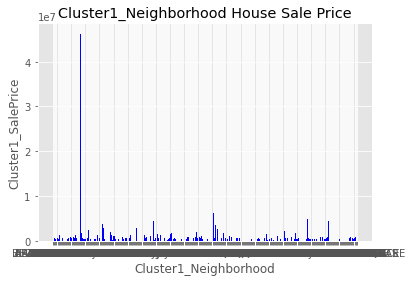

In [92]:
import numpy as np
import matplotlib.pyplot as plt

Cluster1_Neighborhood = neighborhoods_venues_sorted_house_price[neighborhoods_venues_sorted_house_price['Cluster Labels'] == 0]['Neighborhood']
Cluster1_SalePrice = neighborhoods_venues_sorted_house_price[neighborhoods_venues_sorted_house_price['Cluster Labels'] == 0]['SALE PRICE']

x = np.arange(len(Cluster1_Neighborhood))
plt.bar(x, Cluster1_SalePrice, color=['blue'])
plt.xticks(x, Cluster1_Neighborhood)
plt.xlabel('Cluster1_Neighborhood')
plt.ylabel('Cluster1_SalePrice')
plt.title('Cluster1_Neighborhood House Sale Price')
plt.show()

print("The average price of the house in Cluster 1 region : $" , round(Cluster1_SalePrice.mean(),2))

Cluster 2

In [93]:
nyc_cluster_2_df = nyc_merged2[nyc_merged2['Cluster Labels'] == 1].reset_index(drop = True)
nyc_cluster_2_df.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Queens,Whitestone,40.781291,-73.814202,1.0,Deli,ATM,Opera House,Pedestrian Plaza,Party Supply Store,...,Organization,Organic Grocery,Optometrist,Ophthalmologist,Office Supply Store,Performing Arts Venue,Obstetrician Gynecologist (Ob-gyn),Nursing Home,Noodle Restaurant,Non-Profit Organization


The average price of the house in Cluster 2 region : $ 724665.6


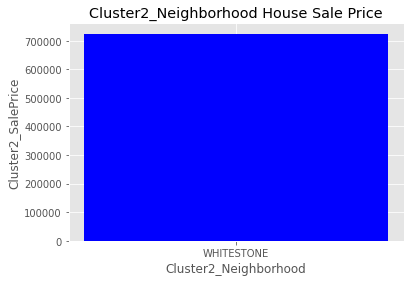

In [94]:
Cluster2_Neighborhood = neighborhoods_venues_sorted_house_price[neighborhoods_venues_sorted_house_price['Cluster Labels'] == 1]['Neighborhood']
Cluster2_SalePrice = neighborhoods_venues_sorted_house_price[neighborhoods_venues_sorted_house_price['Cluster Labels'] == 1]['SALE PRICE']

x = np.arange(len(Cluster2_Neighborhood))
plt.bar(x, Cluster2_SalePrice, color=['blue'])
plt.xticks(x, Cluster2_Neighborhood)
plt.xlabel('Cluster2_Neighborhood')
plt.ylabel('Cluster2_SalePrice')
plt.title('Cluster2_Neighborhood House Sale Price')
plt.show()

print("The average price of the house in Cluster 2 region : $" , round(Cluster2_SalePrice.mean(),2))

Cluster 3

In [95]:
nyc_cluster_3_df = nyc_merged2[nyc_merged2['Cluster Labels'] == 2].reset_index(drop = True)
nyc_cluster_3_df.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Queens,Breezy Point,40.557401,-73.925512,2.0,Beach,Hair Salon,Hiking Trail,Other Great Outdoors,ATM,...,Painter,Organization,Organic Grocery,Optometrist,Ophthalmologist,Opera House,Office Supply Store,Obstetrician Gynecologist (Ob-gyn),Nursing Home,Noodle Restaurant
1,Queens,Neponsit,40.572037,-73.857547,2.0,Beach,ATM,Ophthalmologist,Pedestrian Plaza,Party Supply Store,...,Organization,Organic Grocery,Optometrist,Opera House,Movie Theater,Office Supply Store,Obstetrician Gynecologist (Ob-gyn),Nursing Home,Noodle Restaurant,Non-Profit Organization
2,Queens,Roxbury,40.567376,-73.892138,2.0,Beach,Pub,Hiking Trail,Fast Food Restaurant,Grocery Store / Supermarket,...,Pedestrian Plaza,Party Supply Store,Parking,Park,Pakistani Restaurant,Japanese Curry Restaurant,Painter,Other Great Outdoors,Organization,Organic Grocery
3,Queens,Hammels,40.587338,-73.805530,2.0,Beach,Fast Food Restaurant,Health and Beauty Service,Playground,Food Truck,...,Optometrist,Painter,Parking,Other Great Outdoors,Organization,Organic Grocery,Pakistani Restaurant,Opera House,Ophthalmologist,Pedestrian Plaza


The average price of the house in Cluster 3 region : $ 370587.1


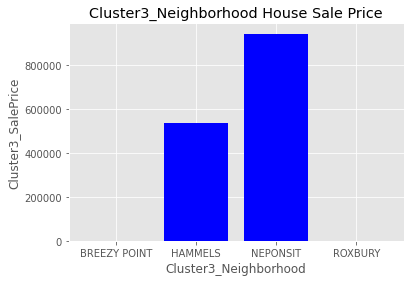

In [96]:
Cluster3_Neighborhood = neighborhoods_venues_sorted_house_price[neighborhoods_venues_sorted_house_price['Cluster Labels'] == 2]['Neighborhood']
Cluster3_SalePrice = neighborhoods_venues_sorted_house_price[neighborhoods_venues_sorted_house_price['Cluster Labels'] == 2]['SALE PRICE']

x = np.arange(len(Cluster3_Neighborhood))
plt.bar(x, Cluster3_SalePrice, color=['blue'])
plt.xticks(x, Cluster3_Neighborhood)
plt.xlabel('Cluster3_Neighborhood')
plt.ylabel('Cluster3_SalePrice')
plt.title('Cluster3_Neighborhood House Sale Price')
plt.show()

print("The average price of the house in Cluster 3 region : $" , round(Cluster3_SalePrice.mean(),2))

Cluster 4

In [98]:
nyc_cluster_4_df = nyc_merged2[nyc_merged2['Cluster Labels'] == 3].reset_index(drop = True)
nyc_cluster_4_df.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Queens,Bayswater,40.611322,-73.765968,3.0,Playground,ATM,Office Supply Store,Party Supply Store,Parking,...,Organic Grocery,Optometrist,Ophthalmologist,Opera House,Obstetrician Gynecologist (Ob-gyn),Pediatrician,Nursing Home,Noodle Restaurant,Non-Profit Organization,Night Club


The average price of the house in Cluster 4 region : $ 0.0


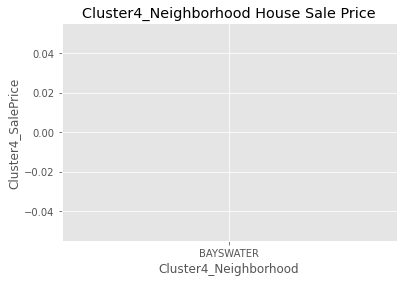

In [99]:
Cluster4_Neighborhood = neighborhoods_venues_sorted_house_price[neighborhoods_venues_sorted_house_price['Cluster Labels'] == 3]['Neighborhood']
Cluster4_SalePrice = neighborhoods_venues_sorted_house_price[neighborhoods_venues_sorted_house_price['Cluster Labels'] == 3]['SALE PRICE']

x = np.arange(len(Cluster4_Neighborhood))
plt.bar(x, Cluster4_SalePrice, color=['blue'])
plt.xticks(x, Cluster4_Neighborhood)
plt.xlabel('Cluster4_Neighborhood')
plt.ylabel('Cluster4_SalePrice')
plt.title('Cluster4_Neighborhood House Sale Price')
plt.show()

print("The average price of the house in Cluster 4 region : $" , round(Cluster4_SalePrice.mean(),2))

Cluster 5

In [62]:
nyc_cluster_4_df = nyc_merged2[nyc_merged2['Cluster Labels'] == 4].reset_index(drop = True)
nyc_cluster_4_df.head()

NameError: NameError: name 'nyc_merged2' is not defined

In [60]:
Cluster5_Neighborhood = neighborhoods_venues_sorted_house_price[neighborhoods_venues_sorted_house_price['Cluster Labels'] == 4]['Neighborhood']
Cluster5_SalePrice = neighborhoods_venues_sorted_house_price[neighborhoods_venues_sorted_house_price['Cluster Labels'] == 4]['SALE PRICE']

x = np.arange(len(Cluster5_Neighborhood))
plt.bar(x, Cluster5_SalePrice, color=['blue'])
plt.xticks(x, Cluster5_Neighborhood, rotation=30)
plt.xlabel('Cluster5_Neighborhood')
plt.ylabel('Cluster5_SalePrice')
plt.title('Cluster5_Neighborhood House Sale Price')
plt.show()

print("The average price of the house in Cluster 5 region : $" , round(Cluster5_SalePrice.mean(),2))

NameError: NameError: name 'neighborhoods_venues_sorted_house_price' is not defined

Through analysis, we can conclude that Neighborhoods in Cluster 4 are not probably residential areas, since didn't get the prices in that area.


# Models

# Models

# DBSCAN_clustering_model

## DBSCAN Clustering Model

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import DBSCAN
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

import pandas as pd

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

#import MinMaxScaler for Normalization
from sklearn.preprocessing import MinMaxScaler

# PCA scatterplot
import plotly.express as px
from sklearn.decomposition import PCA

#for box and whisker plots
import seaborn as sns

In [3]:
# load geo data
nyc_geo_dataframe = pd.read_csv("nyc_data.csv")

In [4]:
nyc_geo_dataframe

,name,longitude,latitude,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score
0,Allerton,-73.859319,40.865788,860.0,1.50,28707.0,511.5,27.259983
1,Annadale,-74.178549,40.538114,11.0,1.75,27073.0,263.7,45.011856
2,Arden Heights,-74.185887,40.549286,10.0,1.70,25117.0,482.5,44.121985
3,Arlington,-74.165104,40.635325,0.0,1.55,29715.0,482.5,38.728529
4,Arrochar,-74.067124,40.596313,145.0,1.75,15659.0,317.3,48.440916
...,...,...,...,...,...,...,...,...
410,Washington Heights (North),482.500000,482.500000,482.5,482.50,482.5,693.3,NaN
411,Washington Heights (South),482.500000,482.500000,482.5,482.50,482.5,751.1,NaN
412,West Chelsea,482.500000,482.500000,482.5,482.50,482.5,369.4,NaN
413,Williamsburg (North),482.500000,482.500000,482.5,482.50,482.5,239.0,NaN


In [5]:
#leaves out longitude and latitude
nyc_geo_dataframe_features_only = nyc_geo_dataframe[['uber_count','avg_price','adj_pop','median_daily_test_rate','avg_test_score']]

In [168]:
#normalize
scaler = MinMaxScaler()
normalized_df1 = scaler.fit_transform(nyc_geo_dataframe_features_only)
normalized_df1

In [169]:
#make interpretable df
normalized_df2 = pd.DataFrame(data=normalized_df1, columns=['uber_count','avg_price','adj_pop','median_daily_test_rate','avg_test_score'])
normalized_df2

,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score
0,0.004261,0.000727,0.213172,0.154940,0.226248
1,0.000055,0.001246,0.201038,0.054799,0.480299
2,0.000050,0.001143,0.186513,0.143221,0.467564
3,0.000000,0.000831,0.220657,0.143221,0.390377
4,0.000718,0.001246,0.116280,0.076460,0.529373
...,...,...,...,...,...
410,0.002391,1.000000,0.003583,0.228410,NaN
411,0.002391,1.000000,0.003583,0.251768,NaN
412,0.002391,1.000000,0.003583,0.097515,NaN
413,0.002391,1.000000,0.003583,0.044817,NaN


In [153]:
#scale the data
#scaled_df_for_clustering = StandardScaler().fit_transform(nyc_geo_dataframe_features_only)

In [154]:
#scaled_df_for_clustering

## PCA Feature Reduction

In [173]:
n_components = 3 #from above

In [176]:
pca = PCA(n_components = n_components)
components = pca.fit_transform(normalized_df2)

ValueError: ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [158]:
#components

NameError: NameError: name 'components' is not defined

## Clustering model using DBSCAN

In [177]:
#use grid search to optimize these
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='manhattan')

In [178]:
# fit and predict
db_clusters = db.fit_predict(components)
db_clusters

NameError: NameError: name 'components' is not defined

In [179]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [180]:
# Plot DBSCAN clusters
plot_clusters(components, db_clusters)

NameError: NameError: name 'components' is not defined

In [11]:
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [12]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [14]:
merged_df = pd.read_csv("Merged DataFrame.csv", index_col=0)

In [15]:
merged_df

,Arrests,BusShelters,Restaurants,Landmarks,Count Blue Collar,Count White Collar
BK09,35.0,6.0,206.0,1416.0,2477.0,11583.0
BK17,125.0,35.0,162.0,2.0,9871.0,16940.0
BK19,63.0,14.0,48.0,4.0,4716.0,8379.0
BK21,213.0,15.0,8.0,18.0,4657.0,5095.0
BK23,201.0,14.0,1.0,0.0,1946.0,4386.0
...,...,...,...,...,...,...
SI37,138.0,25.0,78.0,90.0,4392.0,6586.0
SI45,167.0,23.0,55.0,1.0,3290.0,6261.0
SI48,18.0,4.0,0.0,0.0,4273.0,7628.0
SI54,46.0,13.0,33.0,1.0,6628.0,13168.0


In [16]:
column_names = list(merged_df.columns)

In [17]:
ss = StandardScaler()
scaled_df = pd.DataFrame(ss.fit_transform(merged_df.astype(float)))

In [18]:
scaled_df.columns = column_names

In [19]:
scaled_df

,Arrests,BusShelters,Restaurants,Landmarks,Count Blue Collar,Count White Collar
0,-0.915597,-1.087420,0.010965,2.455431,-1.062461,-0.062940
1,-0.418329,1.635946,-0.109806,-0.394035,0.570785,0.609382
2,-0.760891,-0.336147,-0.422711,-0.390005,-0.567893,-0.465054
3,0.067889,-0.242238,-0.532503,-0.361792,-0.580925,-0.877208
4,0.001587,-0.336147,-0.551716,-0.398065,-1.179753,-0.966190
...,...,...,...,...,...,...
190,-0.346501,0.696854,-0.340368,-0.216699,-0.639461,-0.690082
191,-0.186270,0.509036,-0.403498,-0.396050,-0.882879,-0.730871
192,-1.009525,-1.275238,-0.554461,-0.398065,-0.665746,-0.559307
193,-0.854819,-0.430056,-0.463883,-0.396050,-0.145555,0.135983


In [20]:
# provides reasonable results, 5 clusters
db = DBSCAN(eps=0.6, min_samples=3)

In [21]:
#db = DBSCAN(eps=1.54, min_samples=2)

In [22]:
y_db = db.fit_predict(scaled_df)

In [23]:
y_db

In [24]:
df = scaled_df.copy()
df['Cluster'] = y_db
df = df.groupby('Cluster').mean()
df = df.transpose().reset_index()
df

Cluster,index,-1,0,1,2,3,4,5
0,Arrests,0.566709,-0.465262,-0.554617,-0.729582,0.156292,-1.081353,-0.490156
1,BusShelters,0.567070,-0.516741,0.008187,0.634248,-0.085722,-1.525663,-0.179631
2,Restaurants,0.526615,-0.460716,-0.323899,-0.551716,-0.390689,-0.554461,0.172908
3,Landmarks,0.445684,-0.374703,-0.395379,-0.319473,-0.377914,-0.395379,-0.367838
4,Count Blue Collar,0.593886,-0.550831,1.315472,-1.590236,0.378097,-1.609601,0.596187
5,Count White Collar,0.662640,-0.556942,0.149119,-1.486151,-0.053193,-1.516649,0.142467


In [25]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=df[-1], theta=df['index'], fill='toself', name='Cluster 0'))
fig.add_trace(go.Scatterpolar(r=df[0], theta=df['index'], fill='toself', name='Cluster 1'))
fig.add_trace(go.Scatterpolar(r=df[1], theta=df['index'], fill='toself', name='Cluster 2'))
fig.add_trace(go.Scatterpolar(r=df[2], theta=df['index'], fill='toself', name='Cluster 3'))
fig.add_trace(go.Scatterpolar(r=df[3], theta=df['index'], fill='toself', name='Cluster 4'))
fig.add_trace(go.Scatterpolar(r=df[4], theta=df['index'], fill='toself', name='Cluster 5'))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 3.5]
    )),
  showlegend=True
)

fig.show()

Unsupported

In [26]:
dbscan_result = merged_df.copy()
dbscan_result['cluster'] = y_db
dbscan_result

,Arrests,BusShelters,Restaurants,Landmarks,Count Blue Collar,Count White Collar,cluster
BK09,35.0,6.0,206.0,1416.0,2477.0,11583.0,-1
BK17,125.0,35.0,162.0,2.0,9871.0,16940.0,-1
BK19,63.0,14.0,48.0,4.0,4716.0,8379.0,0
BK21,213.0,15.0,8.0,18.0,4657.0,5095.0,0
BK23,201.0,14.0,1.0,0.0,1946.0,4386.0,0
...,...,...,...,...,...,...,...
SI37,138.0,25.0,78.0,90.0,4392.0,6586.0,0
SI45,167.0,23.0,55.0,1.0,3290.0,6261.0,0
SI48,18.0,4.0,0.0,0.0,4273.0,7628.0,0
SI54,46.0,13.0,33.0,1.0,6628.0,13168.0,0


In [45]:
#dbscan_result.to_csv('Clustering/DBSCAN_Trial.csv')

### Tune Epsilon Value

In [27]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

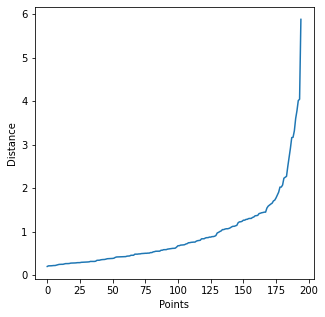

In [28]:

n = 3
nearest_neighbors = NearestNeighbors(n_neighbors=n)
neighbors = nearest_neighbors.fit(scaled_df)
distances, indices = neighbors.kneighbors(scaled_df)
distances = np.sort(distances[:,n-1], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("Distance_curve.png", dpi=300)

1.5388033170299869


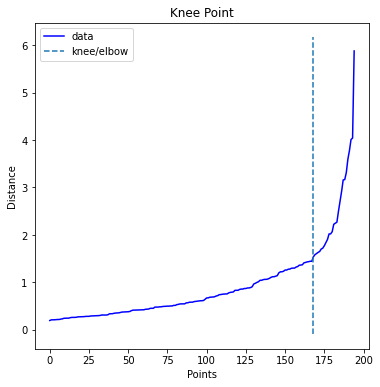

In [29]:
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

print(distances[knee.knee])

## Visualize Clusters on Map

In [30]:
def visualize_clusters(cluster_result_df, clusters_array):
    
    # add column of cluster values to cluster result DataFrame
    cluster_result_df['cluster'] = clusters_array
    
    # creat list to match neighborhood with each observation 
    nb_polygon = []
    for i in range(len(cluster_result_df)):
        try:
            for j in range(len(f.nb_df)):
                if cluster_result_df.index[i] == f.nb_df.ntacode[j]:
                    nb_polygon.append(f.nb_df.geometry[j])
                    break
        except:
            pass
        
    # add column of neighborhoods to cluster result DataFrame
    cluster_result_df['geometry'] = nb_polygon
    
    # convert cluster result to GeoDataFrame
    gdf = gpd.GeoDataFrame(cluster_result_df, geometry=cluster_result_df.geometry, crs="EPSG:4326")
    
    # plot on NYC map
    fig, ax = plt.subplots(figsize=(15,15))
    gdf.plot(ax=ax, column='cluster', cmap='Dark2', categorical=True, legend=True)
    plt.show()
    
    fig.clf()

In [34]:
cluster_result = merged_df.copy()

In [35]:
visualize_clusters(cluster_result, y_db)

ValueError: ValueError: Length of values (0) does not match length of index (195)

In [33]:
f.visualize_clusters(cluster_result, y_db)

NameError: NameError: name 'f' is not defined

# DBSCAN 2

## DSCAN 2

In [57]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import numpy as np
from plotly.subplots import make_subplots
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import functions as f
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import geopandas as gpd
from pyproj import CRS
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv('Merged DataFrame.csv', index_col = 0)

datas = StandardScaler(with_mean = False).fit_transform(data)
df_not_scaled = pd.DataFrame(data,columns = data.columns)
df = pd.DataFrame(datas,columns = data.columns)
col = list(df.columns)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyD

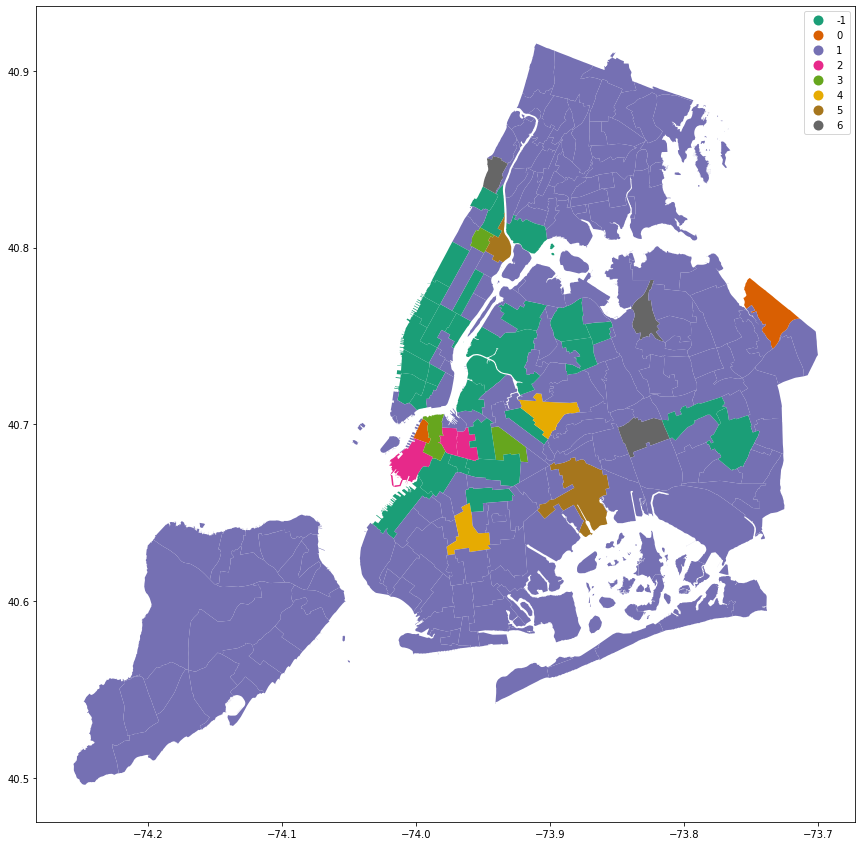

In [59]:
dbscan_dict = {}
new_df = df.copy()
features = list(new_df.columns)

#PCA
PCAb = PCA(n_components=2)
PCA_df = PCAb.fit_transform(new_df)
var = PCAb.explained_variance_ratio_.sum()

#Find true Epsilon
n = 2
nearest_neighbors = NearestNeighbors(n_neighbors=n)
neighbors = nearest_neighbors.fit(new_df)
distances, indices = neighbors.kneighbors(new_df)
distances = np.sort(distances[:,n-1], axis=0)
x = np.arange(len(distances))
knee = KneeLocator(x, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
eps = distances[knee.knee]

#DB scan
db = DBSCAN(eps, min_samples=2)
y_db = db.fit_predict(new_df)
new_df['Cluster'] = y_db+1
nyc = f.visualize_clusters(df_not_scaled,y_db)

#RadarPlot Generation
fig = go.Figure()
for j in range(new_df['Cluster'].nunique()-1):
    fig.add_trace(go.Scatterpolar(r=list(new_df[new_df['Cluster'] == j+1].mean()), theta=features, fill='toself', name='Cluster '+ str(j+1)))
    
fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 6])), showlegend=True)
     
dbscan_dict['All'] = [var,fig,nyc]


#iterations of dropping features
for i in range(len(col)):
    #drop
    new_df = df.drop(col[i],axis = 1)
    features = list(new_df.columns)

    #PCA for variance
    PCAb = PCA(n_components=2)
    PCA_df = PCAb.fit_transform(new_df)
    var = PCAb.explained_variance_ratio_.sum()
    
    #find true epsilon
    n = 2
    nearest_neighbors = NearestNeighbors(n_neighbors=n)
    neighbors = nearest_neighbors.fit(new_df)
    distances, indices = neighbors.kneighbors(new_df)
    distances = np.sort(distances[:,n-1], axis=0)
    x = np.arange(len(distances))
    knee = KneeLocator(x, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    eps = distances[knee.knee]
    
    #DB scan
    db = DBSCAN(eps, min_samples=2)
    y_db = db.fit_predict(new_df)
    new_df['Cluster'] = y_db+1
    nyc = f.visualize_clusters(df_not_scaled,y_db)
    
    #RadarPlot Generation
    fig = go.Figure()
    for j in range(new_df['Cluster'].nunique()-1):
        fig.add_trace(go.Scatterpolar(r=list(new_df[new_df['Cluster'] == j+1].mean()), theta=features, fill='toself', name='Cluster '+ str(j+1)))
    
    fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 6])), showlegend=True)
     
    dbscan_dict[col[i]] = [var,fig,nyc]

#Plotting Radar Charts
for x in dbscan_dict:
    dbscan_dict[x][1].update_layout(title_text=x + ' ' + str(dbscan_dict[x][0]),title_font_size=20)
    dbscan_dict[x][1].show()
    

### Kmeans

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyD

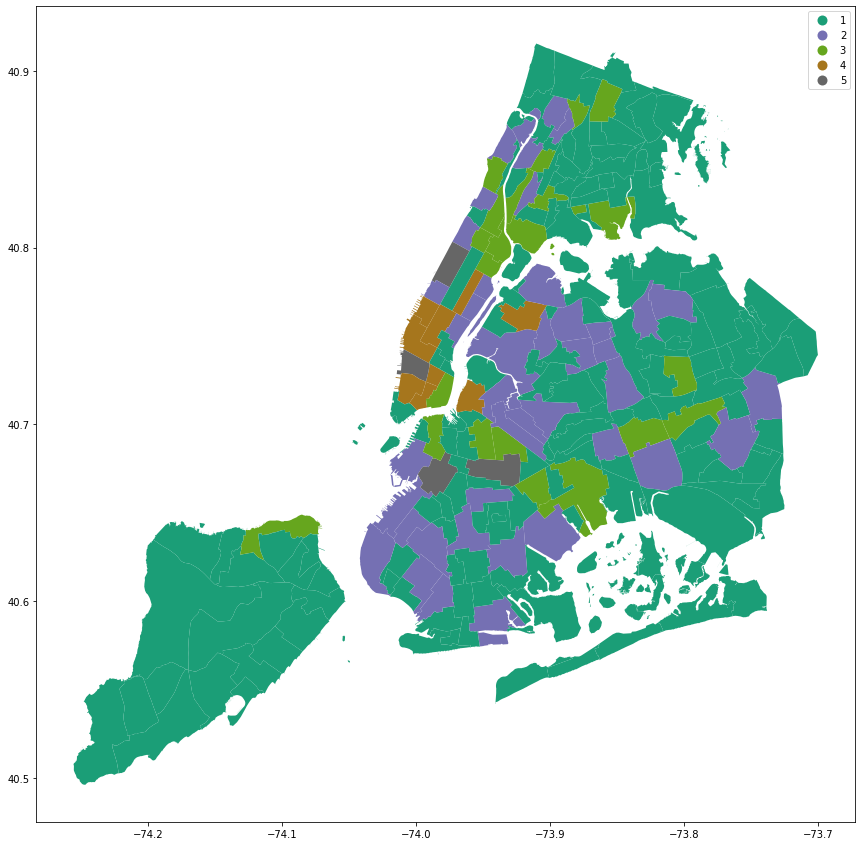

In [60]:
kmeans_dict = {}
clusters = 5
n_init = 20
new_df = df.copy()
features = list(new_df.columns)

#PCA
PCAb = PCA(n_components=2)
PCA_df = PCAb.fit_transform(new_df)
var = PCAb.explained_variance_ratio_.sum()

#KMeans scan
km = KMeans(n_clusters=clusters,n_init=n_init)
y_km = km.fit_predict(new_df)
new_df['Cluster'] = y_km+1
f.visualize_clusters(df_not_scaled,y_km+1)

#RadarPlot Generation
fig = go.Figure()
for j in range(clusters):
    fig.add_trace(go.Scatterpolar(r=list(new_df[new_df['Cluster'] == j+1].mean()), theta=features, fill='toself', name='Cluster '+ str(j+1)))
    
fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 6])), showlegend=True)
     
kmeans_dict['All'] = [var,fig,nyc]


#iterations of dropping features
for i in range(len(col)):
    #drop
    new_df = df.drop(col[i],axis = 1)
    features = list(new_df.columns)
    
    #PCA for variance
    PCAb = PCA(n_components=2)
    PCA_df = PCAb.fit_transform(new_df)
    var = PCAb.explained_variance_ratio_.sum()
    
    #KMeans scan
    km = KMeans(n_clusters=clusters,n_init=n_init)
    y_km = km.fit_predict(new_df)
    new_df['Cluster'] = y_km+1
    nyc = f.visualize_clusters(df_not_scaled,y_km+1)
    
    #RadarPlot Generation
    fig = go.Figure()
    for j in range(clusters):
        fig.add_trace(go.Scatterpolar(r=list(new_df[new_df['Cluster'] == j+1].mean()), theta=features, fill='toself', name='Cluster '+ str(j+1)))
    
    fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 6])), showlegend=True)
     
    kmeans_dict[col[i]] = [var,fig]

#Plotting Radar Charts
for x in kmeans_dict:
    kmeans_dict[x][1].update_layout(title_text=x + ' ' + str(kmeans_dict[x][0]),title_font_size=20)
    kmeans_dict[x][1].show()

### Heirarchical

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyD

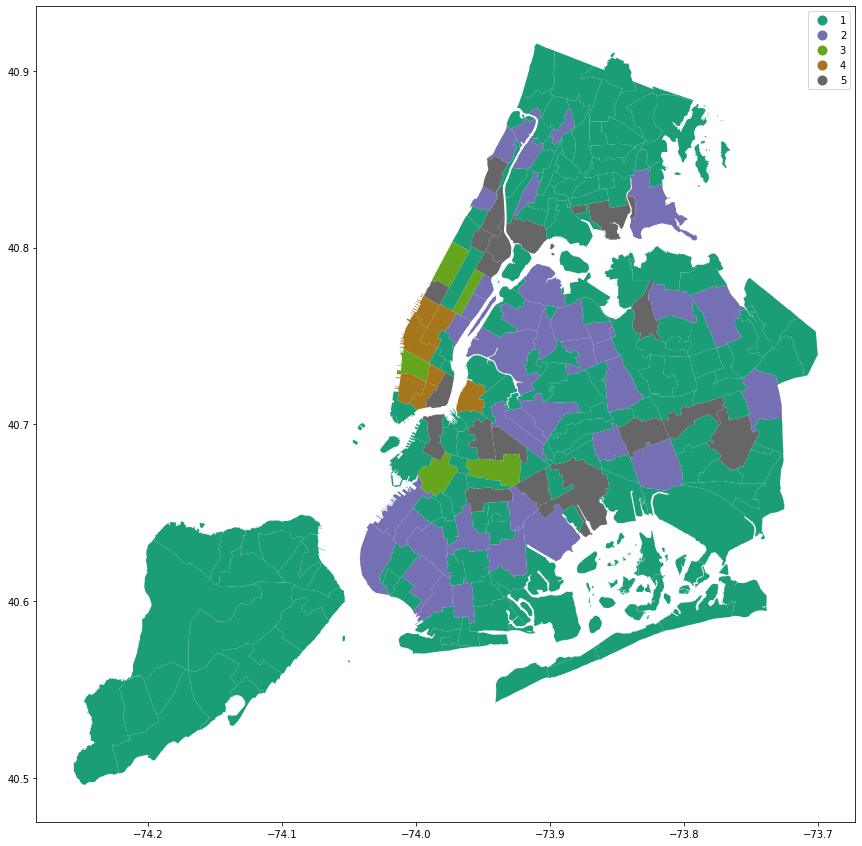

In [61]:
heir_dict = {}
clusters = 5
new_df = df.copy()
features = list(new_df.columns)

#PCA
PCAb = PCA(n_components=2)
PCA_df = PCAb.fit_transform(new_df)
var = PCAb.explained_variance_ratio_.sum()

#Heirarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters = clusters)
y_hc = ac.fit_predict(new_df)
new_df['Cluster'] = y_km+1
nyc = f.visualize_clusters(df_not_scaled,y_hc+1)

#RadarPlot Generation
fig = go.Figure()
for j in range(clusters):
    fig.add_trace(go.Scatterpolar(r=list(new_df[new_df['Cluster'] == j+1].mean()), theta=features, fill='toself', name='Cluster '+ str(j+1)))
    
fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 6])), showlegend=True)
     
heir_dict['All'] = [var,fig,nyc]

#iterations of dropping features
for i in range(len(col)):
    #drop
    new_df = df.drop(col[i],axis = 1)
    features = list(new_df.columns)
    
    #PCA for variance
    PCAb = PCA(n_components=2)
    PCA_df = PCAb.fit_transform(new_df)
    var = PCAb.explained_variance_ratio_.sum()
    
    #Heirarchical
    ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters = clusters)
    y_hc = ac.fit_predict(new_df)
    new_df['Cluster'] = y_km+1
    nyc = f.visualize_clusters(df_not_scaled,y_hc+1)
        
    #RadarPlot Generation
    fig = go.Figure()
    for j in range(clusters):
        fig.add_trace(go.Scatterpolar(r=list(new_df[new_df['Cluster'] == j+1].mean()), theta=features, fill='toself', name='Cluster '+ str(j+1)))
    
    fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 6])), showlegend=True)
     
    heir_dict[col[i]] = [var,fig,nyc]

#Plotting Radar Charts
for x in heir_dict:
    heir_dict[x][1].update_layout(title_text=x + ' ' + str(heir_dict[x][0]),title_font_size=20)
    heir_dict[x][1].show()

# Heirarchial Clustering

## Heirarchial Clustering

In [181]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [182]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# PCA scatterplot
import plotly.express as px
from sklearn.decomposition import PCA

#import MinMaxScaler for Normalization
from sklearn.preprocessing import MinMaxScaler

In [183]:
# load geo data
nyc_geo_dataframe = pd.read_csv("nyc_data.csv")

In [184]:
nyc_geo_dataframe

,name,longitude,latitude,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score
0,Allerton,-73.859319,40.865788,860.0,1.50,28707.0,511.5,27.259983
1,Annadale,-74.178549,40.538114,11.0,1.75,27073.0,263.7,45.011856
2,Arden Heights,-74.185887,40.549286,10.0,1.70,25117.0,482.5,44.121985
3,Arlington,-74.165104,40.635325,0.0,1.55,29715.0,482.5,38.728529
4,Arrochar,-74.067124,40.596313,145.0,1.75,15659.0,317.3,48.440916
...,...,...,...,...,...,...,...,...
410,Washington Heights (North),482.500000,482.500000,482.5,482.50,482.5,693.3,NaN
411,Washington Heights (South),482.500000,482.500000,482.5,482.50,482.5,751.1,NaN
412,West Chelsea,482.500000,482.500000,482.5,482.50,482.5,369.4,NaN
413,Williamsburg (North),482.500000,482.500000,482.5,482.50,482.5,239.0,NaN


In [185]:
#leaves out longitude and latitude
nyc_geo_dataframe_features_only = nyc_geo_dataframe[['uber_count','avg_price','adj_pop','median_daily_test_rate','avg_test_score']]

In [186]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [212]:
# create an object
ac = AgglomerativeClustering(affinity='manhattan',
                             linkage='complete',
                             n_clusters = 4)

In [270]:
# fit and predict
y_hc = ac.fit_predict(normalized_df2)

In [271]:
y_hc

In [272]:
np.unique(y_hc)

In [273]:
y_hc_df = pd.DataFrame(y_hc)

In [274]:
y_hc_df

,0
0,1
1,1
2,1
3,1
4,1
...,...
297,1
298,1
299,1
300,1


In [275]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='complete'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

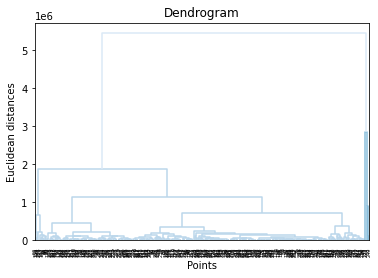

In [276]:
# Plot dendrogram
plot_dendrogram(nyc_geo_dataframe_features_only)

In [277]:
#normalize
scaler = MinMaxScaler()
normalized_df1 = scaler.fit_transform(nyc_geo_dataframe_features_only)
normalized_df1

In [281]:
#make interpretable df
normalized_df2 = pd.DataFrame(data=normalized_df1, columns=['uber_count','avg_price','adj_pop','median_daily_test_rate','avg_test_score'])
normalized_df2

ValueError: ValueError: Shape of passed values is (302, 6), indices imply (302, 5)

In [282]:
n_components = 2 #from above

In [283]:
pca = PCA(n_components = n_components)
components = pca.fit_transform(normalized_df2)
# Plotting the PCA scatter plot for different classes

fig = px.scatter(components, x=0, y=1, color=y_hc_df[0]) #check if column name is correct
fig.show()

Unsupported

# K_means_clustering

In [215]:
# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

#import MinMaxScaler for Normalization
from sklearn.preprocessing import MinMaxScaler

# PCA scatterplot
import plotly.express as px
from sklearn.decomposition import PCA

#for box and whisker plots
import seaborn as sns

In [216]:
# load geo data
nyc_geo_dataframe = pd.read_csv("nyc_data2.csv")

In [217]:
nyc_geo_dataframe.rename(columns= {'Median Sale Price - na has median':'house_price'}, inplace = True)

In [218]:
nyc_geo_dataframe.head()

,name,longitude,latitude,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score,house_price
0,Allerton,-73.859319,40.865788,860,1.50,28707,511.5,27.259983,312000
1,Annadale,-74.178549,40.538114,11,1.75,27073,263.7,45.011856,649500
2,Arden Heights,-74.185887,40.549286,10,1.70,25117,482.5,44.121985,578500
3,Arlington,-74.165104,40.635325,0,1.55,29715,482.5,38.728529,590000
4,Arrochar,-74.067124,40.596313,145,1.75,15659,317.3,48.440916,560000


In [219]:
nyc_geo_dataframe.describe()

,longitude,latitude,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score,house_price
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,3.020000e+02
mean,-73.945370,40.701794,8627.738411,1.660596,41037.817881,482.539073,39.916554,6.672672e+05
std,0.120893,0.097543,21929.739104,0.175360,28266.396667,332.476092,10.083204,4.543206e+05
min,-74.246569,40.505334,0.000000,1.150000,0.000000,128.100000,11.450911,5.000000e+04
25%,-73.998705,40.619182,0.000000,1.550000,23926.000000,288.750000,33.000982,4.981248e+05
50%,-73.931460,40.702969,920.000000,1.650000,32887.500000,482.500000,40.922400,5.900000e+05
75%,-73.857525,40.767796,3673.250000,1.800000,52225.750000,482.500000,45.712733,7.383750e+05
max,-73.708847,40.908543,201832.000000,2.050000,159351.000000,3527.500000,81.326022,5.504250e+06


In [220]:
#leaves out longitude and latitude
nyc_geo_dataframe_features_only = nyc_geo_dataframe[['uber_count','avg_price','adj_pop','median_daily_test_rate','avg_test_score','house_price']]

In [221]:
#normalize
scaler = MinMaxScaler()
normalized_df1 = scaler.fit_transform(nyc_geo_dataframe_features_only)
#normalized_df1

In [222]:
#make interpretable df
normalized_df2 = pd.DataFrame(data=normalized_df1, columns=['uber_count','avg_price','adj_pop','median_daily_test_rate','avg_test_score','house_price'])
normalized_df2

,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score,house_price
0,0.004261,0.388889,0.180149,0.112785,0.226248,0.048036
1,0.000055,0.666667,0.169895,0.039889,0.480299,0.109914
2,0.000050,0.611111,0.157621,0.104254,0.467564,0.096897
3,0.000000,0.444444,0.186475,0.104254,0.390377,0.099005
4,0.000718,0.666667,0.098267,0.055657,0.529373,0.093505
...,...,...,...,...,...,...
297,0.010197,0.277778,0.347729,0.027681,0.418960,0.097172
298,0.004013,0.277778,0.270058,0.038830,0.493530,0.026585
299,0.000025,0.666667,0.124436,0.049832,0.469729,0.136591
300,0.022628,0.277778,0.279088,0.034065,0.508237,0.058853


In [223]:
def plot_distortion(X,max_clusters = 30):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

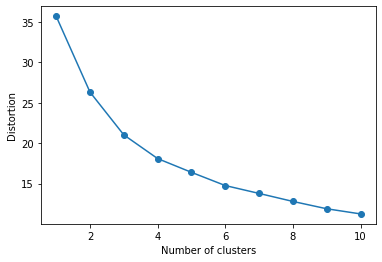

In [224]:
# elbow rule graph
plot_distortion(normalized_df2,max_clusters=10)

In [225]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10) # how many initial runs

In [226]:
# y Axis for K-Means

y_km = km.fit_predict(normalized_df2)

In [227]:
y_km

In [228]:
y_km_series_for_merging = pd.Series(data=y_km, name='clusters_K_Means')

In [229]:
y_km_series_for_merging

In [230]:
#this merge is on to the orig, unnormalized data
#use: box and whisker plots

orig_merged_df = nyc_geo_dataframe_features_only.merge(y_km_series_for_merging, how='inner', left_index = True, right_index = True)

In [231]:
#this merge is on the normalized data
#use: PCA, Heatmap

normalized_merged_df_1 = normalized_df2.merge(y_km_series_for_merging, how='inner', left_index = True, right_index = True)

In [232]:
normalized_merged_df_1.head()

,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score,house_price,clusters_K_Means
0,0.004261,0.388889,0.180149,0.112785,0.226248,0.048036,0
1,0.000055,0.666667,0.169895,0.039889,0.480299,0.109914,3
2,0.000050,0.611111,0.157621,0.104254,0.467564,0.096897,3
3,0.000000,0.444444,0.186475,0.104254,0.390377,0.099005,0
4,0.000718,0.666667,0.098267,0.055657,0.529373,0.093505,3


In [233]:
normalized_merged_df_1.describe()

,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score,house_price,clusters_K_Means
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.042747,0.567329,0.257531,0.104265,0.407379,0.113172,1.526490
std,0.108653,0.194844,0.177384,0.097804,0.144303,0.083297,1.389672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.444444,0.150147,0.047258,0.308408,0.082161,0.000000
50%,0.004558,0.555556,0.206384,0.104254,0.421774,0.099005,2.000000
75%,0.018200,0.722222,0.327740,0.104254,0.490329,0.126209,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [234]:
n_components = 2 

In [235]:
pca = PCA(n_components = n_components)
components = pca.fit_transform(normalized_df2)
# Plotting the PCA scatter plot for different classes

fig = px.scatter(components, x=0, y=1, color=normalized_merged_df_1['clusters_K_Means']) #check if column name is correct
fig.show()

Unsupported

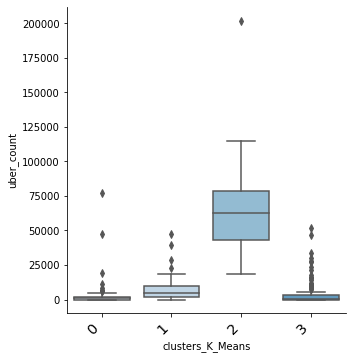

In [236]:
sns.set_palette("Blues")
sns.catplot(x = 'clusters_K_Means', y= "uber_count", kind="box", data= orig_merged_df)

#the below formula makes it all easier to read
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

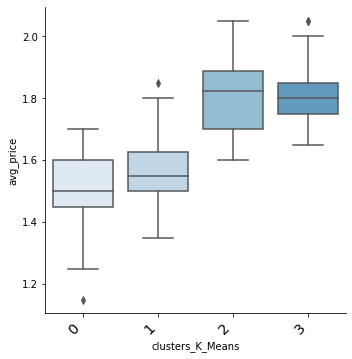

In [237]:
#avg_price
sns.set_palette("Blues")
sns.catplot(x = 'clusters_K_Means', y= "avg_price", kind="box", data= orig_merged_df)

#the below formula makes it all easier to read
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

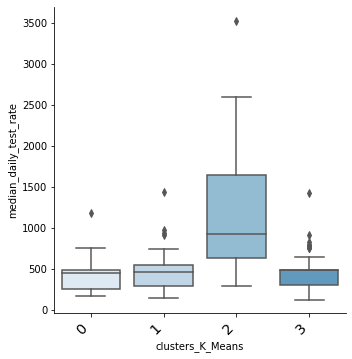

In [238]:
#median_daily_test_rate
sns.set_palette("Blues")
sns.catplot(x = 'clusters_K_Means', y= "median_daily_test_rate", kind="box", data= orig_merged_df)

#the below formula makes it all easier to read
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

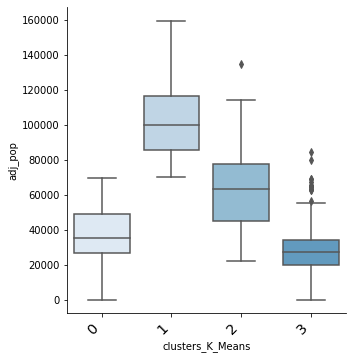

In [239]:
#median_daily_test_rate
sns.set_palette("Blues")
sns.catplot(x = 'clusters_K_Means', y= "adj_pop", kind="box", data= orig_merged_df)

#the below formula makes it all easier to read
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

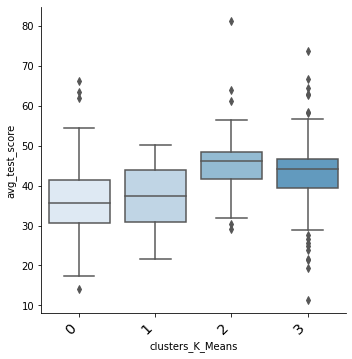

In [240]:
#median_daily_test_rate
sns.set_palette("Blues")
sns.catplot(x = 'clusters_K_Means', y= "avg_test_score", kind="box", data= orig_merged_df)

#the below formula makes it all easier to read
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

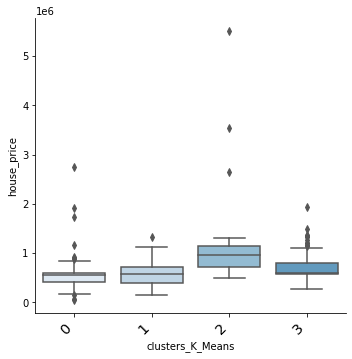

In [241]:
#median_daily_test_rate
sns.set_palette("Blues")
sns.catplot(x = 'clusters_K_Means', y= "house_price", kind="box", data= orig_merged_df)

#the below formula makes it all easier to read
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

In [242]:
orig_merged_df.describe()

,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score,house_price,clusters_K_Means
count,302.000000,302.000000,302.000000,302.000000,302.000000,3.020000e+02,302.000000
mean,8627.738411,1.660596,41037.817881,482.539073,39.916554,6.672672e+05,1.526490
std,21929.739104,0.175360,28266.396667,332.476092,10.083204,4.543206e+05,1.389672
min,0.000000,1.150000,0.000000,128.100000,11.450911,5.000000e+04,0.000000
25%,0.000000,1.550000,23926.000000,288.750000,33.000982,4.981248e+05,0.000000
50%,920.000000,1.650000,32887.500000,482.500000,40.922400,5.900000e+05,2.000000
75%,3673.250000,1.800000,52225.750000,482.500000,45.712733,7.383750e+05,3.000000
max,201832.000000,2.050000,159351.000000,3527.500000,81.326022,5.504250e+06,3.000000


In [243]:
# compute correlations between features
df_corr = normalized_merged_df_1.corr()

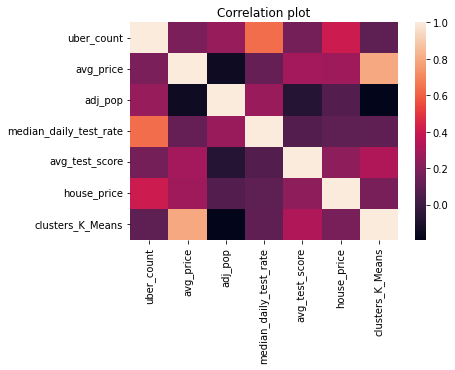

In [244]:
# plot the correlations
sns.heatmap(df_corr)
plt.title('Correlation plot')
plt.show()

In [245]:
normalized_merged_df_1.mean()

In [246]:
df = pd.DataFrame(dict(
    r=[normalized_merged_df_1['uber_count'].mean(),normalized_merged_df_1['avg_price'].mean(),normalized_merged_df_1['median_daily_test_rate'].mean()],
    theta=['uber_count','avg_price','median_daily_test_rate']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

Unsupported

# House Price Prediction

## House price prediction 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
trainingset = pd.read_csv("train.csv")
testset = pd.read_csv("test.csv")
o_submission = pd.read_csv("sample_submission.csv")

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.special import boxcox1p
import missingno as msno
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

pd.set_option("display.float_format", lambda x: "{:.3f}".format(x)) #Limiting floats output to 3 decimal points
pd.set_option("display.max_columns", None)

In [7]:
print(trainingset.shape)
print(testset.shape)

(1460, 81)
(1459, 80)


In [8]:
trainingset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [9]:
# checking duplication
trainingset.duplicated().sum()

0

Note: Train and test data have missing values in diffent columns. Handle all missing values later in the data processing stage.

In [11]:
train_null = trainingset.isnull().sum().sort_values(ascending=False)
train_null = train_null[train_null>0]

test_null = testset.isnull().sum().sort_values(ascending=False)
test_null = test_null[test_null>0]
missing_df = pd.concat([train_null,test_null, train_null/len(trainingset),test_null/len(testset), trainingset[train_null.index].dtypes, testset[test_null.index].dtypes], axis=1)
missing_df.rename({0: "train_null", 1: "test_null", 2: "train_null raito", 3: "test_null raito", 4: "dtype_train", 5: "dtype_test" },  axis='columns')

,train_null,test_null,train_null raito,test_null raito,dtype_train,dtype_test
PoolQC,1453.000,1456.000,0.995,0.998,object,object
MiscFeature,1406.000,1408.000,0.963,0.965,object,object
Alley,1369.000,1352.000,0.938,0.927,object,object
Fence,1179.000,1169.000,0.808,0.801,object,object
FireplaceQu,690.000,730.000,0.473,0.500,object,object
LotFrontage,259.000,227.000,0.177,0.156,float64,float64
GarageYrBlt,81.000,78.000,0.055,0.053,float64,float64
GarageCond,81.000,78.000,0.055,0.053,object,object
GarageType,81.000,76.000,0.055,0.052,object,object
GarageFinish,81.000,78.000,0.055,0.053,object,object


In [14]:
trainingset.SalePrice.describe()

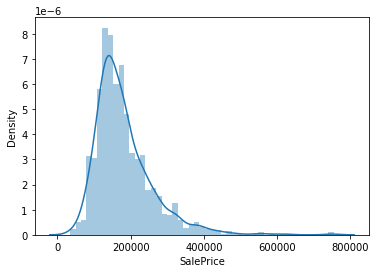

In [17]:
sns.distplot(trainingset.SalePrice)

In [20]:
skew = trainingset.SalePrice.skew()
kurt = trainingset.SalePrice.kurt()
print("Skew: {} /  Kurt: {}".format(skew, kurt))

Skew: 1.8828757597682129 /  Kurt: 6.536281860064529


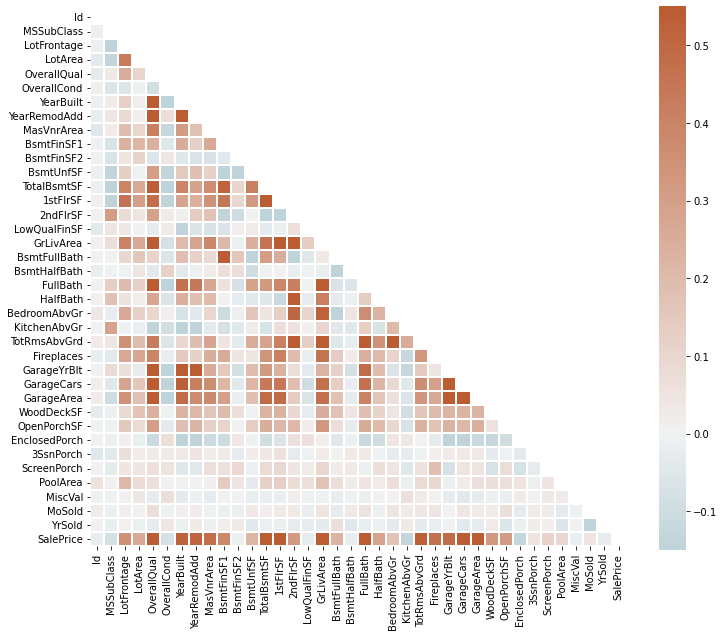

In [21]:
# Replace missging Age values based on other columns
# check correlation between different variables
matrix = trainingset.select_dtypes(exclude="object").corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
cmap = sns.diverging_palette(220, 25, s=80, n=9, as_cmap=True, center="light")
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, mask = mask, annot=False, cmap=cmap, square=True, fmt='.2f',linewidth=.2, center=0, vmin=-0.15, vmax=0.55)
plt.show()

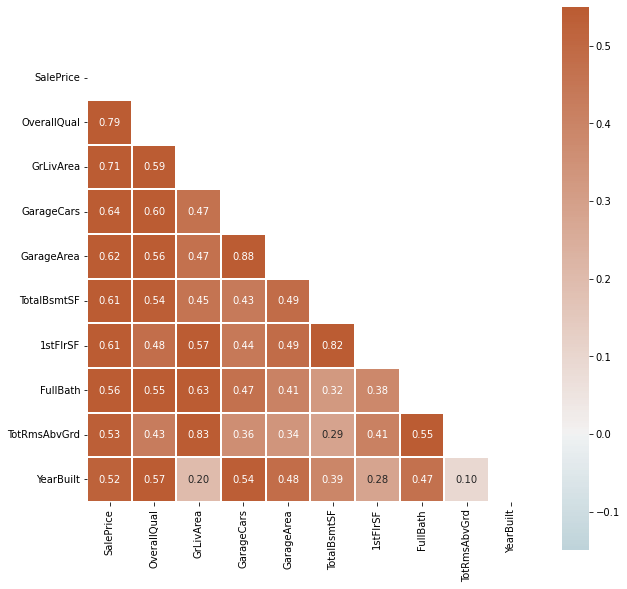

In [24]:
# Pick top 10 features that highly corelated to SalePrice
k = 10 #number of variables for heatmap
col_names = matrix.nlargest(k, 'SalePrice')['SalePrice'].index
coef_matrix = np.corrcoef(trainingset[col_names].values.T)
mask = np.triu(np.ones_like(coef_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 25, s=80, n=9, as_cmap=True, center="light")
plt.figure(figsize=(10, 10))
sns.heatmap(coef_matrix, cbar=True, mask = mask, annot=True, cmap=cmap, square=True, fmt='.2f',linewidth=.2, center=0, vmin=-0.15, vmax=0.55, yticklabels=col_names.values, xticklabels=col_names.values)
plt.show()

* There are outliers in GrLivArea (bottom right corner), TotalBsmtSF, and 1stFlrSF
* After checking these outliers, ID 1298 is the common outliers for all three features, remove this later.
* GrLivArea also has another outlier ID 523, removing this later too.

* 1stFlrSF and TotalBsmtSF are highly correlated. (0.82)
* TotRmsAbvGrd and GrLiveArea are also highly correlated (0.83)
* GarageArea and GarageCards are highly correlated (0.88)

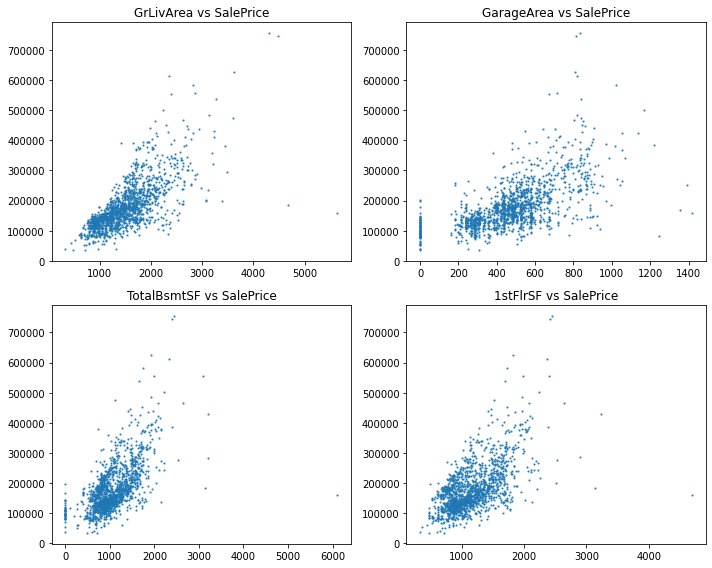

In [25]:
# plot multiple subplots to validate correlations
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0, 0].plot(trainingset.GrLivArea, trainingset.SalePrice, marker="o", linestyle="", markersize=1.2, alpha=.8)
axs[0, 0].set_title('GrLivArea vs SalePrice')
axs[0, 1].plot(trainingset.GarageArea, trainingset.SalePrice, marker="o", linestyle="", markersize=1.2, alpha=.8)
axs[0, 1].set_title('GarageArea vs SalePrice')
axs[1, 0].plot(trainingset.TotalBsmtSF, trainingset.SalePrice, marker="o", linestyle="", markersize=1.2, alpha=.8)
axs[1, 0].set_title('TotalBsmtSF vs SalePrice')
axs[1, 1].plot(trainingset["1stFlrSF"], trainingset.SalePrice, marker="o", linestyle="", markersize=1.2, alpha=.8)
axs[1, 1].set_title('1stFlrSF vs SalePrice')

fig.tight_layout()

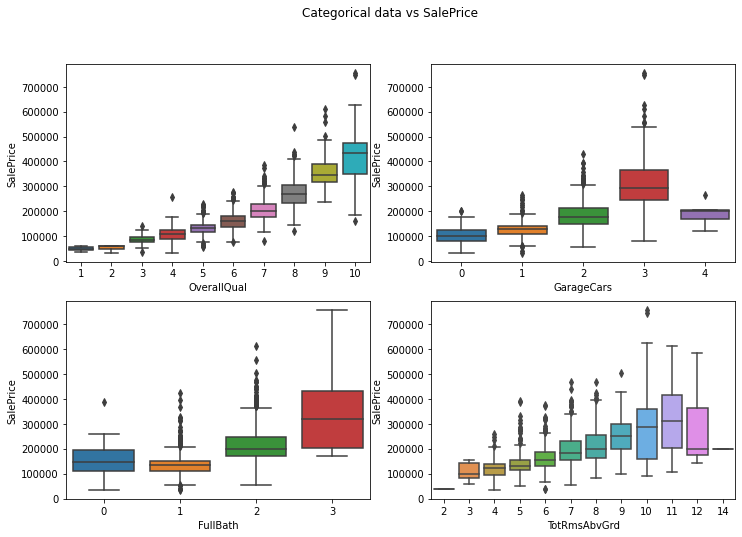

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Categorical data vs SalePrice')

sns.boxplot(ax=axes[0, 0], data=trainingset, x='OverallQual', y='SalePrice')
sns.boxplot(ax=axes[0, 1], data=trainingset, x='GarageCars', y='SalePrice')
sns.boxplot(ax=axes[1, 0], data=trainingset, x='FullBath', y='SalePrice')
sns.boxplot(ax=axes[1, 1], data=trainingset, x='TotRmsAbvGrd', y='SalePrice')

In [27]:
# removing two outliers in GrLivArea
print("Before: {}".format(trainingset.shape))
outlier_index = trainingset[(trainingset.GrLivArea > 4000) & (trainingset.SalePrice < 200000)].index
trainingset = trainingset.drop(outlier_index)
print("After: {}".format(trainingset.shape))

Before: (1460, 81)
After: (1458, 81)


In [28]:
#### Investigate 'LotFrontage'
# After checking plots below, droped two outliers in LotArea(one row)  and LotFrontage (two rows)
# sns.scatterplot(trainingset.LotArea, trainingset.SalePrice)
# sns.scatterplot(trainingset.LotFrontage, trainingset.SalePrice)

# removing outliers in LotFrontage and LotArea
trainingset = trainingset.loc[trainingset.LotArea != max(trainingset.LotArea), :] # one row
trainingset = trainingset.loc[trainingset.LotFrontage != max(trainingset.LotFrontage), :] # one row
print("trainingset data size: {}".format(trainingset.shape))
print("After: {}".format(trainingset.shape))

trainingset data size: (1456, 81)
After: (1456, 81)


### Handling Missing Values

* NA values can cause errors with machine learning later down the line, so I will impute the missing values.
* PoolQC, MiscFeature, Alley, Fence columns have more than 80% of missing values. If there are no good ways to figure out the values, I will drop these columns. The rest columns (FireplaceQu, Lotfrontage etc.) need to impute missing values.
* Based on MSNO graph, features start with 'Garage' in the trainingset have the same number of missing data. 
* Based on MSNO graph, Features start with 'Bsmt' in the trainingset have the same number of missing data. 

In [29]:
nullcols_train = [col for col in trainingset.columns if trainingset[col].isnull().any()]
nullcols_test = [col for col in testset.columns if testset[col].isnull().any()]
print(nullcols_train, len(nullcols_train))
print(nullcols_test, len(nullcols_test))

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] 19
['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType'] 33


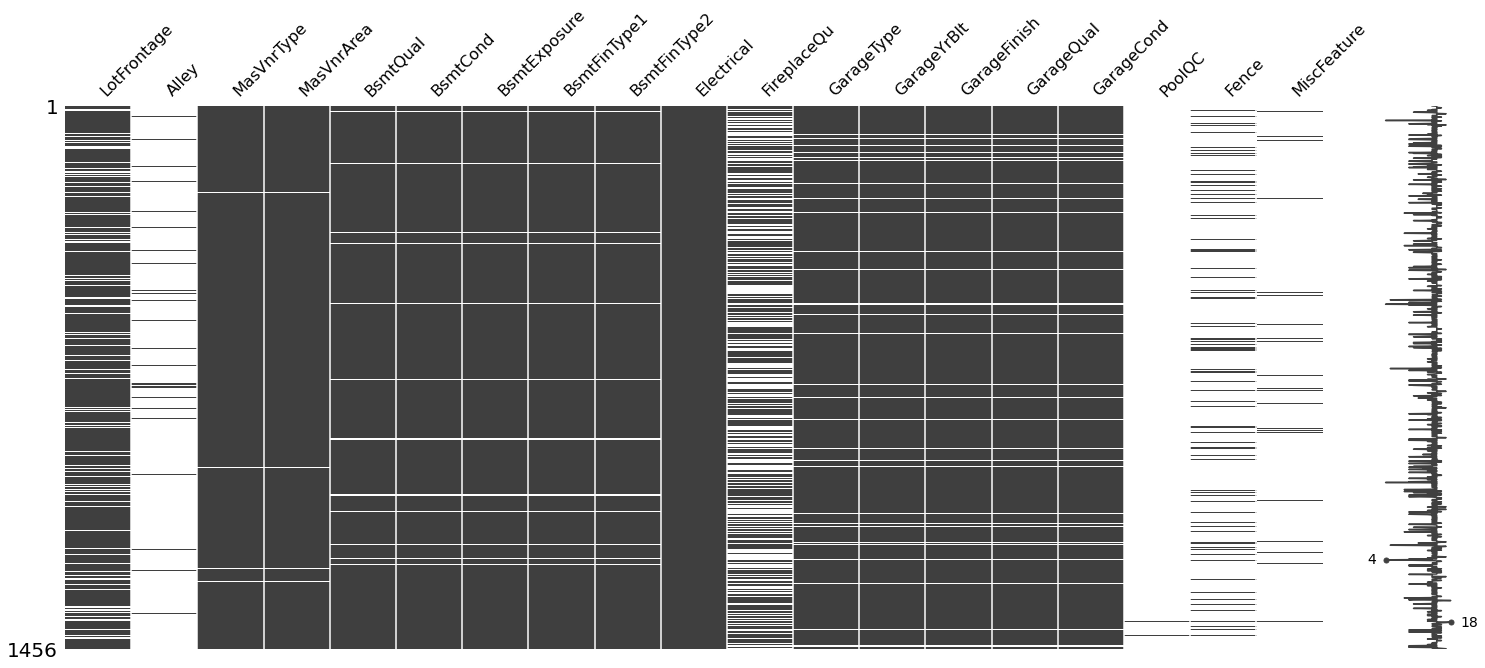

In [30]:
# Visualise missing values.
msno.matrix(trainingset.loc[:, nullcols_train])
# #msno.matrix(trainingset.select_dtypes(include="object")) 
# #msno.matrix(testset.loc[:, test_null.index])

In [31]:
# PoolQC : data description says NA means "No Pool". 
# MiscFeature : data description says NA means "no misc feature".
# Alley : data description says NA means "no alley access".
# Fence: data description says NA means "no fence". 
# FireplaceQu: data description says NA meand "NoFireplace". 
# Features start with 'Garage' in the trainingset have the same number of missing data. 
#-----GarageType, GarageFinish,GarageCond, GarageQual : data description says NA means "No Garage". 
#-----GarageYrBlt has NA beacause the property does not have garage.
#-----GarageArea and GarageCars in the testset has one missing value each beacuse the property does not have a garage according to GarageQual column.
# Features start with 'Bsmtuniquere missing same data.
#-----BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : data description says NA means "No Basement". 
#-----'BsmtFullBath','BsmtHalfBath','BsmtUnfSF', 'TotalBsmtSF' : data is missing because there is no basement.
# MasVnrType, MasVnrArea : Data is missing probably there is no veneer. (8 values are missing in the trainingset.)
values = {
    "PoolQC": "None",
    "MiscFeature": "None",
    "Alley": "None",
    "Fence": "None",
    "FireplaceQu": "None",
    "GarageType": "None",
    "GarageFinish": "None",    
    "GarageCond": "None",
    "GarageQual": "None",
    "GarageYrBlt": 1880.0, #No garage, give an artificial year here    
    "GarageArea": 0,#No garage
    "GarageCars": 0,#No garage
    "BsmtExposure": "None",#No basement
    "BsmtFinType2": "None",#No basement
    "BsmtFinType1": "None",#No basement
    "BsmtCond": "None",#No basement
    "BsmtQual": "None",#No basement
    "BsmtFullBath":0, #No basement
    "BsmtHalfBath":0, #No basement
    "BsmtUnfSF":0, #No basement
    "BsmtFinSF2":0, #No basement
    "BsmtFinSF1":0, #No basement
    "TotalBsmtSF":0, #No basement
    "MasVnrArea": 0,#No Veneer
    "MasVnrType": "None"
}

trainingset.fillna(value=values, inplace=True)
testset.fillna(value=values, inplace=True)

In [32]:
# Electrical, MSZoning,Exterior2nd, Exterior1st, SaleType, KitchenQual: these columns have one or two missing values, 
# imputing missing values with the most common category in the corresponding column.
most_common_cols = ["Electrical", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "KitchenQual"]
for col in most_common_cols:
    trainingset[col] = trainingset[col].fillna(trainingset[col].mode()[0])
    testset[col] = testset[col].fillna(testset[col].mode()[0])

#data description says "Assume typical unless deductions are warranted"
testset["Functional"] = testset["Functional"].fillna("Typ") 

#LotFrontage : Since the area of each street connected to the house property most likely have 
# a similar area to other houses in its neighborhood, fill in missing values by the median LotFrontage of the same neighborhood.
trainingset["LotFrontage"] = trainingset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
testset["LotFrontage"] = testset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [33]:
# Check low variance columns in categorical columns
results = {}
def valueCount(df):
    df_filter = df.select_dtypes(include="object")
    for col in df_filter.columns:
        result = df_filter[col].value_counts(normalize=True) 
        results["------" + col + "------"] = result
    return results

valueCount(trainingset)

{'------MSZoning------': RL        0.788
 RM        0.150
 FV        0.045
 RH        0.011
 C (all)   0.007
 Name: MSZoning, dtype: float64,
 '------Street------': Pave   0.996
 Grvl   0.004
 Name: Street, dtype: float64,
 '------Alley------': None   0.938
 Grvl   0.034
 Pave   0.028
 Name: Alley, dtype: float64,
 '------LotShape------': Reg   0.635
 IR1   0.332
 IR2   0.027
 IR3   0.005
 Name: LotShape, dtype: float64,
 '------LandContour------': Lvl   0.900
 Bnk   0.042
 HLS   0.034
 Low   0.024
 Name: LandContour, dtype: float64,
 '------Utilities------': AllPub   0.999
 NoSeWa   0.001
 Name: Utilities, dtype: float64,
 '------LotConfig------': Inside    0.720
 Corner    0.180
 CulDSac   0.065
 FR2       0.032
 FR3       0.003
 Name: LotConfig, dtype: float64,
 '------LandSlope------': Gtl   0.948
 Mod   0.044
 Sev   0.008
 Name: LandSlope, dtype: float64,
 '------Neighborhood------': NAmes     0.154
 CollgCr   0.103
 OldTown   0.078
 Edwards   0.067
 Somerst   0.059
 Gilbert   0.0

* Select low variance columns from the value_counts above and remove them as these columns are dominated by one single value and not informative to our target at all.
* For instance, 99% of Street has only one value "Pave" 

In [34]:
# 99% of Street has only one value "Pave" 
low_variance_cols = ['Street','Utilities', 'Heating','RoofMatl','Condition2', 'PoolQC', 'MiscFeature'] 
for col in low_variance_cols:
    print(trainingset[col].value_counts(normalize=True)) 
trainingset = trainingset.drop(low_variance_cols,axis=1) # drop 7 columns
testset = testset.drop(low_variance_cols,axis=1) # drop 7 columns

Pave   0.996
Grvl   0.004
Name: Street, dtype: float64
AllPub   0.999
NoSeWa   0.001
Name: Utilities, dtype: float64
GasA    0.979
GasW    0.012
Grav    0.005
Wall    0.003
OthW    0.001
Floor   0.001
Name: Heating, dtype: float64
CompShg   0.984
Tar&Grv   0.007
WdShngl   0.004
WdShake   0.003
Metal     0.001
Membran   0.001
Roll      0.001
Name: RoofMatl, dtype: float64
Norm     0.990
Feedr    0.004
Artery   0.001
RRNn     0.001
PosA     0.001
PosN     0.001
RRAn     0.001
RRAe     0.001
Name: Condition2, dtype: float64
None   0.996
Ex     0.001
Fa     0.001
Gd     0.001
Name: PoolQC, dtype: float64
None   0.963
Shed   0.034
Gar2   0.001
Othr   0.001
TenC   0.001
Name: MiscFeature, dtype: float64


In [35]:
# check if all missing data are imputed.
print(trainingset.isnull().sum().any())
print(testset.isnull().sum().any())
# Check data shapes
print(trainingset.shape)
print(testset.shape)

False
False
(1456, 74)
(1459, 73)


### Handling Skewness in data

In skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models. There are statistical model that are robust to outlier like a Tree-based models but it will limit the possibility to try other models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model.


* Before fixing skewness in data, tree-based models performed better.
* After fixing skewness in data, linear models performed better.

The rule of thumb seems to be:
* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
* If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
* If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

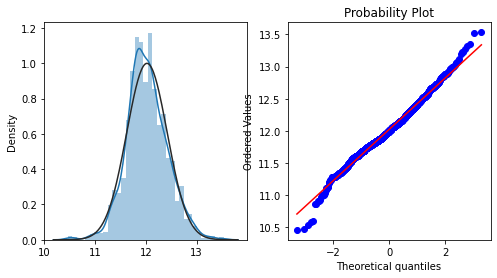

In [36]:
#Before handling skewness in SalePrice
#histogram and normal probability plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
sns.distplot(ax=axs[0], x=trainingset['SalePrice'], fit=norm);
stats.probplot(x= trainingset['SalePrice'], plot=plt)
plt.show()

# After handling skewness
# Applying log transformation on columns without zero values
trainingset["SalePrice"] = np.log(trainingset["SalePrice"])

# Transformed histogram and normal probability plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
sns.distplot(ax=axs[0], x=trainingset['SalePrice'], fit=norm);
stats.probplot(x= trainingset['SalePrice'], plot=plt)
plt.show()

In [37]:
numerical_cols = trainingset.select_dtypes(exclude="object").columns
numerical_cols = numerical_cols.drop("Id")
highly_skewed_cols = [col for col in numerical_cols if np.abs(trainingset[col].skew()) > 0.75] #20 columns

# Using boxcox from scipy library to fix skewness
lam = 0.15
for col in highly_skewed_cols:
    trainingset[col] = boxcox1p(trainingset[col], lam)
    testset[col] = boxcox1p(testset[col], lam)

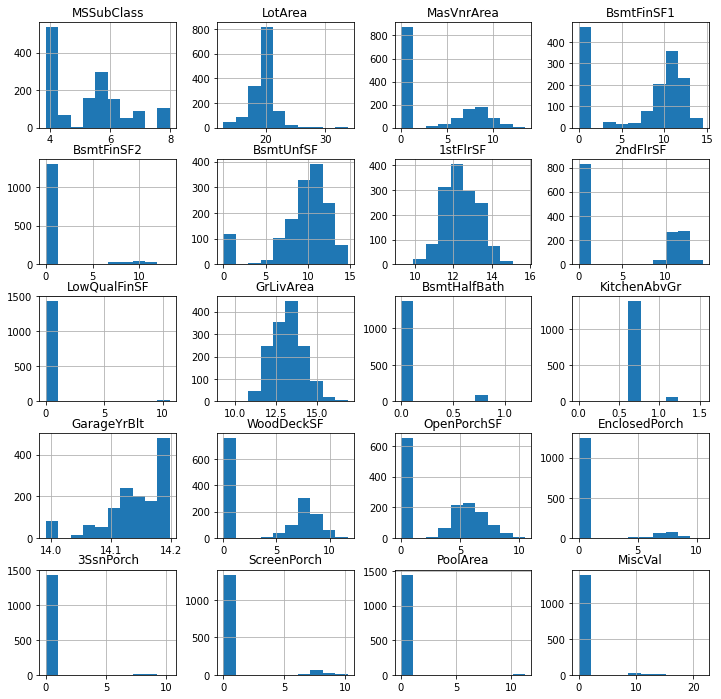

In [38]:
trainingset[highly_skewed_cols].hist(figsize=(12,12))
plt.show()

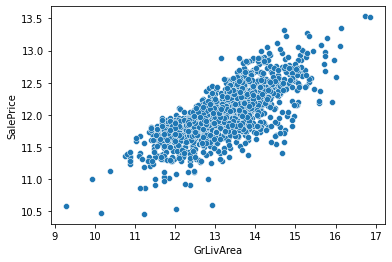

In [39]:
sns.scatterplot(trainingset.GrLivArea, trainingset.SalePrice)

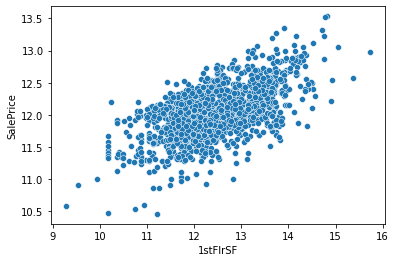

In [40]:
sns.scatterplot(trainingset["1stFlrSF"], trainingset.SalePrice)

In [41]:
ordinal_cols = ["ExterQual", "ExterCond", "BsmtCond", "BsmtQual","HeatingQC", "KitchenQual", 
                "FireplaceQu","GarageQual", "GarageCond", "BsmtFinType1", "BsmtFinType2"]
bin_map  = {'Ex':4, 'Gd':3,'TA':2, 'Fa':1,'Po':1,  'None':0, 
            "GLQ" : 6, "Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5
            }
for col in ordinal_cols:
    trainingset[col] = trainingset[col].map(bin_map)
    testset[col] = testset[col].map(bin_map)

    
BsmtExposure = {"Gd" : 4, "Av": 3, "Mn" : 2, 'No': 1, "None":0}
trainingset['BsmtExposure'] = trainingset['BsmtExposure'].map(BsmtExposure)
testset['BsmtExposure'] = testset['BsmtExposure'].map(BsmtExposure)

PavedDrive =   {"Y" : 2, "N" : 0, "P" : 1}
trainingset['PavedDrive'] = trainingset['PavedDrive'].map(PavedDrive)
testset['PavedDrive'] = testset['PavedDrive'].map(PavedDrive)

In [42]:
print(trainingset.shape)
print(testset.shape)

(1456, 74)
(1459, 73)


In [43]:
print(trainingset.isnull().sum().any())
print(testset.isnull().sum().any())

False
False


## Feature selection with Lasso

In [45]:
# print("{}{}".format(trainingset.shape, testset.shape))

# # Spliting Data
# X = trainingset.drop(["Id","SalePrice"], axis=1)
# y = trainingset.SalePrice
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print("{}{}{}{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

# result = {}
# def evaluation(y, y_pred):
#     r_squared = r2_score(y, y_pred),
#     mae = mean_absolute_error(y, y_pred),
#     mse = mean_squared_error(y, y_pred),
#     rmse = np.sqrt(mean_squared_error(y, y_pred))
#     return r_squared, mae, mse, rmse

# low_cardinality_cols = [col for col in X_train.columns if (X_train[col].dtype=="object") & (X_train[col].nunique()<26)]
# #print(len(low_cardinality_cols), low_cardinality_cols)

# column_trans = make_column_transformer(
#     (OneHotEncoder(handle_unknown="ignore", sparse=False),low_cardinality_cols),
#     remainder='passthrough'
# )
# sc = StandardScaler()


# model = Lasso() 
# pipe = make_pipeline(column_trans, sc, model) 
# params = {"lasso__alpha": np.arange(0.001,0.005,0.001)} #print(pipe.get_params().keys())
# cv_lasso = GridSearchCV(pipe, param_grid=params)
# cv_lasso.fit(X_train, y_train)
# preds_lasso = cv_lasso.predict(X_test)
# preds_lasso = np.exp(preds_lasso) #inverse logrithm on predicted SalePrice.


# lasso_r2, lasso_mae, lasso_mse, lasso_rmse = evaluation(y_test, preds_lasso) 
# print(lasso_r2,lasso_mae, lasso_mse, lasso_rmse)
# print(cv_lasso.best_params_, cv_lasso.best_score_)

# ############################
# # Plot feature graph

# temp_df = pd.DataFrame(column_trans.fit_transform(X_train), columns=column_trans.get_feature_names())
# cols = temp_df.columns 
# temp_df = pd.DataFrame(sc.fit_transform(temp_df), columns=cols)
# names = cols
# lasso = Lasso(alpha=0.003)
# lasso_coef = lasso.fit(temp_df, y_train).coef_

# # pick important features
# names_n = np.array(names)[np.abs(lasso_coef)>0.005]
# lasso_coef_n = lasso_coef[np.abs(lasso_coef)>0.005]
# print(len(names_n),len(lasso_coef_n))

# _ = plt.figure(figsize=(8,8))
# _ = plt.plot(range(len(names_n)), lasso_coef_n,  'bo-')
# _ = plt.xticks(range(len(names_n)), names_n, rotation=90)
# _ = plt.ylabel('Coefficients')
# plt.show()

In [0]:
# cat_names = ['MSZoning', 'Alley', 'LotShape','LandContour', 'LotConfig', 'LandSlope',
#                    'Neighborhood', 'Condition1', 'BldgType','HouseStyle', 
#                    'RoofStyle', 'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation',
#                    'CentralAir', 'Electrical', 'Functional',
#                    'GarageType', 'GarageFinish', 'Fence','SaleType', 'SaleCondition']
# for i, v in enumerate(cat_names):
#     print(i, ":", v)

# #names_n

############# Selected features after fixing the skewness ############# 
# # # # Threshold: abs(Lasso coef)> 0 (after fixed skewness)
# features_53 = ['MSZoning','Alley','LotShape', 'LandContour','LotConfig', 'LandSlope', 'Neighborhood',
# 'Condition1','BldgType', 'HouseStyle','RoofStyle', 'Exterior1st', 'Exterior2nd','MasVnrType','Foundation',
# 'CentralAir', 'Functional', 'GarageType', 'GarageFinish','Fence',  'SaleType','SaleCondition',
# 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
# 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea',
# 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr','KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 
#  'FireplaceQu','GarageCars', 'GarageArea', 'GarageQual', 'WoodDeckSF','OpenPorchSF', 'ScreenPorch', 'PoolArea']

############# Selected features before fixing the skewness ############# 
# # Threshold: abs(Lasso coef)> 0
# selected_features_64 = ['MSZoning', 'Alley', 'LotShape','LandContour', 'LotConfig', 'LandSlope', 
#                         'Neighborhood', 'Condition1', 'BldgType','HouseStyle', 'RoofStyle', 
#                         'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation',
#                         'Functional','GarageType', 'GarageFinish', 'Fence','SaleType', 'SaleCondition',
#                         'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual','OverallCond', 
#                         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 
#                         'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
#                         'TotalBsmtSF','HeatingQC', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 
#                         'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 
#                         'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea',
#                         'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF','OpenPorchSF', 
#                         '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold']

# # Threshold: abs(Lasso coef)> 1000
# selected_features_48 = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType','HouseStyle', 'Exterior1st',
#  'Exterior2nd', 'MasVnrType', 'Foundation', 'Functional','GarageType',  'Fence','SaleCondition', 'MSSubClass', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
# 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 
# 'BsmtFullBath', 'HalfBath','BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
# 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual','WoodDeckSF', 'OpenPorchSF', 
# '3SsnPorch', 'ScreenPorch','PoolArea', 'MoSold']


# # Threshold: abs(Lasso coef)> 2000
# selected_features_31 = ['LandSlope', 'Neighborhood','BldgType','HouseStyle', 
#                         'Exterior1st','MasVnrType', 'Functional','GarageFinish','SaleCondition',
#                         'MSSubClass', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 
#                         'MasVnrArea','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
#                         'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr','KitchenQual', 
#                         'TotRmsAbvGrd', 'GarageCars', 'GarageArea','GarageQual', 'OpenPorchSF', 'PoolArea']

# # Threshold: abs(Lasso coef)> 7000
# selected_features_5 = ['SaleType', 'OverallQual', 'YearBuilt', 'BsmtFinSF1','GrLivArea']



In [46]:
# # Threshold: abs(Lasso coef)> 0.005 (after fixed skewness)
# features_36 = ['MSZoning', 'LotConfig','Neighborhood', 'Condition1', 'BldgType', 'Exterior1st','MasVnrType', 
#  'Foundation','CentralAir', 'Functional','SaleType', 'SaleCondition', 'LotArea', 'OverallQual',
#  'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual','BsmtQual', 'BsmtExposure', 
#  'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
#  'HalfBath', 'KitchenAbvGr', 'KitchenQual','Fireplaces', 'GarageCars', 'GarageArea', 'GarageQual',
#  'WoodDeckSF', 'ScreenPorch']

############# Remove redundant features #################
# removed two highly correlated features: 1stFlrSF and GarageCards
# 1stFlrSF and TotalBsmtSF are highly correlated. (0.82)
# TotRmsAbvGrd and GrLiveArea are also highly correlated (0.83)
# GarageArea and GarageCards are highly correlated (0.88)
features_34 = ['MSZoning', 'LotConfig','Neighborhood', 'Condition1', 'BldgType', 'Exterior1st','MasVnrType', 
 'Foundation','CentralAir', 'Functional','SaleType', 'SaleCondition', 'LotArea', 'OverallQual',
 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual','BsmtQual', 'BsmtExposure', 
 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',  'GrLivArea', 'BsmtFullBath',
 'HalfBath', 'KitchenAbvGr', 'KitchenQual','Fireplaces', 'GarageArea', 'GarageQual',
 'WoodDeckSF', 'ScreenPorch']



## Build Models with selected features

In [47]:
print("{}{}".format(trainingset.shape, testset.shape))

# Spliting Data
X = trainingset[features_34]
y = trainingset.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("{}{}{}{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

(1456, 74)(1459, 73)
(1164, 34)(1164,)(292, 34)(292,)


In [48]:
result = {}
def evaluation(y, y_pred):
    r_squared = r2_score(y, y_pred),
    mae = mean_absolute_error(y, y_pred),
    mse = mean_squared_error(y, y_pred),
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return r_squared, mae, mse, rmse

In [49]:
low_cardinality_cols = [col for col in X_train.columns if (X_train[col].dtype=="object") & (X_train[col].nunique()<26)]
#print(len(low_cardinality_cols), low_cardinality_cols)

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False),low_cardinality_cols),
    remainder='passthrough'
)
sc = StandardScaler()

## Linear Regression

In [50]:
model = LinearRegression() 
pipe = make_pipeline(column_trans, model) 
pipe.fit(X_train, y_train)
preds_lm = pipe.predict(X_test)
preds_lm = np.exp(preds_lm) #inverse logrithm on predicted SalePrice.
print(pipe.score(X_test, y_test))
pd.DataFrame(preds_lm.reshape(len(preds_lm),1)).describe()

0.9113962394085356


,0
count,292.000
mean,175582.951
std,73891.135
min,51303.661
25%,125830.223
50%,157211.136
75%,208888.929
max,530327.108


##  Lasso

In [51]:
model = Lasso() 
pipe = make_pipeline(column_trans, sc, model) 
params = {"lasso__alpha": np.arange(0.0008,0.002,0.0001)} #print(pipe.get_params().keys())
cv_lasso = GridSearchCV(pipe, param_grid=params)
cv_lasso.fit(X_train, y_train)
preds_lasso = cv_lasso.predict(X_test)
preds_lasso = np.exp(preds_lasso) #inverse logrithm on predicted SalePrice.
lasso_r2, lasso_mae, lasso_mse, lasso_rmse = evaluation(y_test, preds_lasso) 
print(cv_lasso.best_params_, cv_lasso.best_score_)

{'lasso__alpha': 0.0014000000000000002} 0.9184897259214806


## Ridge

In [52]:
model = Ridge() 
pipe = make_pipeline(column_trans, sc, model) 
params = {"ridge__alpha": np.arange(1,100,10)} #print(pipe.get_params().keys())
cv_ridge = GridSearchCV(pipe, param_grid=params)
cv_ridge.fit(X_train, y_train)
preds_ridge = cv_ridge.predict(X_test)
preds_ridge = np.exp(preds_ridge) #inverse logrithm on predicted SalePrice.
print(cv_ridge.best_params_, cv_ridge.best_score_)

{'ridge__alpha': 21} 0.9176388642181958


## Elastic Net

In [53]:
model = ElasticNet()
pipe = make_pipeline(column_trans, sc, model) 
#print(pipe.get_params().keys())
params = {"elasticnet__alpha": np.arange(0,0.2,0.01)} 
cv_elastic = GridSearchCV(pipe, param_grid=params)
cv_elastic.fit(X_train, y_train)
preds_elastic = cv_elastic.predict(X_test)
preds_elastic = np.exp(preds_elastic) #inverse logrithm on predicted SalePrice.
print(cv_elastic.best_params_, cv_elastic.best_score_)

{'elasticnet__alpha': 0.0} 0.9169826705402014


## SVM

In [54]:
model = SVR()
pipe = make_pipeline(column_trans, sc, model) 
#print(pipe.get_params().keys())
params = {"svr__C": np.arange(1,1.6,0.1)} 
cv_svr = GridSearchCV(pipe, param_grid=params)
cv_svr.fit(X_train, y_train)
preds_svr = cv_svr.predict(X_test)
preds_svr = np.exp(preds_svr) #inverse logrithm on predicted SalePrice.
print(cv_svr.best_params_, cv_svr.best_score_)

{'svr__C': 1.3000000000000003} 0.8243757067733151


## Random Forest Regression

In [55]:
model = RandomForestRegressor()
pipe = make_pipeline(column_trans, model) 
#print(pipe.get_params().keys())
params = {"randomforestregressor__n_estimators": np.arange(50,150,50)} 
cv_rf = GridSearchCV(pipe, param_grid=params)
cv_rf.fit(X_train, y_train)
preds_rf = cv_rf.predict(X_test)
preds_rf = np.exp(preds_rf) #inverse logrithm on predicted SalePrice.
pd.DataFrame(preds_rf.reshape(len(preds_rf),1)).describe()
print(cv_rf.best_params_, cv_rf.best_score_)

{'randomforestregressor__n_estimators': 100} 0.8782650818235622


## XGBoost

In [58]:
model = XGBRegressor()
pipe = make_pipeline(column_trans, model) 
#print(pipe.get_params().keys())
params = {"xgbregressor__n_estimators": np.arange(100,200,50), "xgbregressor__learning_rate": np.arange(0.08,0.12,0.01)} 
cv_xg = GridSearchCV(pipe, param_grid=params)
cv_xg.fit(X_train, y_train)
preds_xg = cv_xg.predict(X_test)
preds_xg = np.exp(preds_xg) #inverse logrithm on predicted SalePrice.
pd.DataFrame(preds_xg.reshape(len(preds_xg),1)).describe()
print(cv_xg.best_params_, cv_xg.best_score_)

{'xgbregressor__learning_rate': 0.09, 'xgbregressor__n_estimators': 150} 0.904769258770908


## Model comparison

In [61]:
lm_r2, lm_mae, lm_mse, lm_rmse = evaluation(np.exp(y_test), preds_lm) 
result["Liner"] = [lm_r2, lm_mae, lm_mse, lm_rmse]

lasso_r2, lasso_mae, lasso_mse, lasso_rmse = evaluation(np.exp(y_test), preds_lasso) 
result["Lasso"] = [lasso_r2,lasso_mae, lasso_mse, lasso_rmse]

ridge_r2, ridge_mae, ridge_mse, ridge_rmse = evaluation(np.exp(y_test), preds_ridge) 
result["Ridge"] = [ridge_r2, ridge_mae, ridge_mse, ridge_rmse]

elastic_r2, elastic_mae, elastic_mse, elastic_rmse = evaluation(np.exp(y_test), preds_elastic) 
result["Elastic"] = [elastic_r2, elastic_mae, elastic_mse, elastic_rmse]

svr_r2, svr_mae, svr_mse, svr_rmse = evaluation(np.exp(y_test), preds_svr) 
result["SVR"] = [svr_r2, svr_mae, svr_mse, svr_rmse]

rf_r2, rf_mae, rf_mse, rf_rmse = evaluation(np.exp(y_test), preds_rf) 
result["RandomForest"] = [rf_r2, rf_mae, rf_mse, rf_rmse]

xg_r2, xg_mae, xg_mse, xg_rmse = evaluation(np.exp(y_test), preds_rf) 
result["XGBoost"] = [xg_r2, xg_mae, xg_mse, xg_rmse]

In [63]:
result = pd.DataFrame.from_dict(result, orient='index', columns=["R2 Score","MAE","MSE","RMSE"])
result.sort_values(by="RMSE")

,R2 Score,MAE,MSE,RMSE
Ridge,"(0.9435081993040229,)","(12753.602242153316,)","(363776440.6784191,)",19072.924
Lasso,"(0.9431825031968225,)","(12688.13314705819,)","(365873746.2902156,)",19127.826
Liner,"(0.9394561767754066,)","(13137.277774610777,)","(389869259.7220465,)",19745.107
Elastic,"(0.9394546196324985,)","(13137.909585507274,)","(389879286.87461996,)",19745.361
RandomForest,"(0.907152764913005,)","(16039.976102167084,)","(597885645.1850483,)",24451.700
XGBoost,"(0.907152764913005,)","(16039.976102167084,)","(597885645.1850483,)",24451.700
SVR,"(0.8501370472933831,)","(17479.50398085943,)","(965035825.6159027,)",31065.026


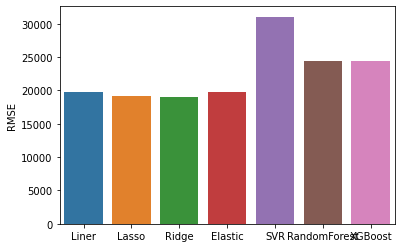

In [64]:
sns.barplot(result.index,result.RMSE)

## Output

In [69]:
test_X = testset[features_34]
# model = RandomForestRegressor(n_estimators=100)
# pipe = make_pipeline(column_trans, model) 
# pipe.fit(X_train, y_train)
# predictions = pipe.predict(test_X)
# pd.DataFrame(predictions.reshape(len(predictions),1)).describe()


# model = XGBRegressor(n_estimators=150, learning_rate=0.08)
# pipe = make_pipeline(column_trans, model) 
# pipe.fit(X_train, y_train)
# predictions = pipe.predict(test_X)
# predictions = np.exp(predictions) #inverse logrithm on predicted SalePrice.

model = Lasso(alpha=0.0014) 
pipe = make_pipeline(column_trans, sc, model) 
pipe.fit(X_train, y_train)
predictions = pipe.predict(test_X)
predictions = np.exp(predictions) #inverse logrithm on predicted SalePrice.
pd.DataFrame(predictions.reshape(len(predictions),1)).describe()


# model = Ridge(alpha=21) 
# pipe = make_pipeline(column_trans, sc, model) 
# pipe.fit(X_train, y_train)
# predictions = pipe.predict(test_X)
# predictions = np.exp(predictions) #inverse logrithm on predicted SalePrice.
# pd.DataFrame(predictions.reshape(len(predictions),1)).describe()

,0
count,1459.000
mean,178442.351
std,77884.290
min,41106.976
25%,126840.702
50%,157344.508
75%,212304.828
max,1034094.800


In [70]:
output_dic = {"Id": testset["Id"], "SalePrice": predictions}
output_df = pd.DataFrame(output_dic)
output_df.to_csv("submission.csv", index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Learning Curve

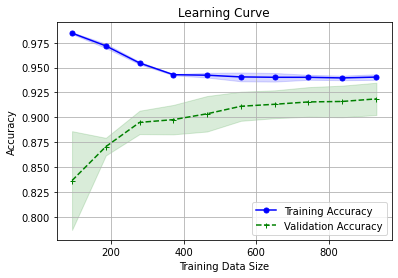

In [75]:
from sklearn.model_selection import learning_curve
# Use learning curve to get training and test scores along with train sizes
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe, 
    X=X_train, 
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=1,
    cv=5
)

#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [76]:
############# Fix Skewness ##################
# #trainingset.loc[:,highly_skewed_cols].describe()
# has_zero_cols = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 
# 'KitchenAbvGr', 'BsmtHalfBath',  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
#  'MiscVal']
# non_zero_cols = ['MSSubClass', 'LotArea', '1stFlrSF', 'GrLivArea','GarageYrBlt']

# for col in non_zero_cols:
#     trainingset[col] = np.log(trainingset[col])

# # Handle cols with zero values
# for col in has_zero_cols:
#     trainingset[col + '_flag'] = trainingset[col]>0
#     trainingset.loc[trainingset[col + '_flag']==1,col] = np.log(trainingset[col])

# # Drop columns with _flag where I created to perform log transformation on the columns contain zero values.
# trainingset = trainingset[trainingset.columns.drop(list(trainingset.filter(regex='_flag')))]

Feature selection lecture: [UW Machine Learning: Regression](https://www.coursera.org/learn/ml-regression?specialization=machine-learning)
    
I've read some great notebooks in Kaggle. Regarding imputing missing values, I refered the notebook below.
* [Handling Missing Values](https://www.kaggle.com/dansbecker/handling-missing-values ) by DANB.
* [Using Categorical Data with One Hot Encoding](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding) by DANB.
* [Stacked Regressions : Top 4% on LeaderBoard](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) by Serigne.

The note below has a stragetic approach about EDA. 
* [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) by PEDRO MARCELINO

Transforming skewed data (why and how)
* [Skewed Data: A problem to your statistical model](https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37)
* [Transforming Skewed Data for Machine Learning](https://odsc.medium.com/transforming-skewed-data-for-machine-learning-90e6cc364b0)
* https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

# NYC_suggestion

# NYC_suggestion

## Import and Scale Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [15]:
data = pd.read_csv('nyc_data3.csv')

In [16]:
data.rename(columns={'Median Sale Price - na has median':'house_price'}, inplace=True)

In [17]:
data_features = data[['uber_count', 'avg_price', 'pop_density', 'median_daily_test_rate', 'avg_test_score', 'house_price']]

In [18]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data_features) # np array of scaled features

In [19]:
scaled_df = pd.DataFrame(data=scaled_features, columns=['uber_count', 'avg_price', 'pop_density', 'median_daily_test_rate', 'avg_test_score', 'house_price']) # scaled features as dataframe

## K-means Model for Suggestion

In [20]:
# K-means model instantiation
km = KMeans(n_clusters=3,
            n_init=10,
           random_state=12)

In [21]:
# fit_predict K-means model on scaled_df
y_km = km.fit_predict(scaled_df)

In [22]:
# create clusters column in data_features, data, and scaled_df
data_features['cluster'] = y_km
data['cluster'] = y_km
scaled_df['cluster'] = y_km

<ipython-input-22-6852cbe0bf2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['cluster'] = y_km


In [23]:
# create clusters based dataframes
nyc_0 = data_features.loc[data_features['cluster'] == 0]
nyc_1 = data_features.loc[data_features['cluster'] == 1]
nyc_2 = data_features.loc[data_features['cluster'] == 2]
# create clusters based dataframes for scaled dataframes as well
scaled_0 = scaled_df.loc[scaled_df['cluster'] == 0]
scaled_1 = scaled_df.loc[scaled_df['cluster'] == 1]
scaled_2 = scaled_df.loc[scaled_df['cluster'] == 2]

## NYC Neighborhood Suggestion Tool

In [24]:
# feature conversion key
convert = {'a1':scaled_df['uber_count'].min(), 'a2':scaled_df['uber_count'].quantile(0.25), 'a3':scaled_df['uber_count'].quantile(0.5),'a4':scaled_df['uber_count'].quantile(0.75), 'a5':scaled_df['uber_count'].max(),
          'b1':scaled_df['avg_price'].min(), 'b2':scaled_df['avg_price'].quantile(0.25), 'b3':scaled_df['avg_price'].quantile(0.5),'b4':scaled_df['avg_price'].quantile(0.75), 'b5':scaled_df['avg_price'].max(),
          'c1':scaled_df['pop_density'].min(), 'c2':scaled_df['pop_density'].quantile(0.25), 'c3':scaled_df['pop_density'].quantile(0.5),'c4':scaled_df['pop_density'].quantile(0.75), 'c5':scaled_df['pop_density'].max(),
          'd1':scaled_df['median_daily_test_rate'].min(), 'd2':scaled_df['median_daily_test_rate'].quantile(0.25), 'd3':scaled_df['median_daily_test_rate'].quantile(0.5),'d4':scaled_df['median_daily_test_rate'].quantile(0.75), 'd5':scaled_df['median_daily_test_rate'].max(),
          'e1':scaled_df['avg_test_score'].min(), 'e2':scaled_df['avg_test_score'].quantile(0.25), 'e3':scaled_df['avg_test_score'].quantile(0.5),'e4':scaled_df['avg_test_score'].quantile(0.75), 'e5':scaled_df['avg_test_score'].max(),
          'f1':scaled_df['house_price'].min(), 'f2':scaled_df['house_price'].quantile(0.25), 'f3':scaled_df['house_price'].quantile(0.5),'f4':scaled_df['house_price'].quantile(0.75), 'f5':scaled_df['house_price'].max(),}

In [101]:
#NYC_Suggest('a3', 'b3', 'c3', 'd3', 'e3', 'f3')

In [25]:
def NYC_Suggest(a, b, c, d, e, f):
    '''
    Returns cluster grouping and suggested neighborhoods based on inputs.
    
        Parameters:
            a, b, c, d, e, f (str): strings that are letters ranging from a-f and numbers ranging from 1-5
            example: 'a3', 'b3', 'c3', 'd3', 'e3', 'f3'
        Returns:
            Printed returns of the belonging cluster grouping and the top 10 neighborhoods that the K-means algorithm suggests.
    '''
    
    X = [[convert[a], convert[b], convert[c], convert[d], convert[e], convert[f]]]
    
    belong = km.predict(X)
    if belong == 0:
        print('You fit in with cluster 0')
    elif belong == 1:
        print('You fit in with cluster 1')
    elif belong == 2:
        print('You fit in with cluster 2')

    print('\n')
    print('The Top 10 recommended neighborhoods for you to live in are:')
    neigh = NearestNeighbors(n_neighbors=10)
    neigh.fit(scaled_features)
    ind = neigh.kneighbors(X, return_distance=False)
    for i in ind:
        h = i.astype(int)
    for x in h:
        print(data.iloc[x]['name'])

## Submission

In [104]:
submission = data[['name', 'cluster']]

In [107]:
submission.to_csv('submission1.csv', index=False)

In [109]:
submission

,name,cluster
0,Allerton,1
1,Annadale,0
2,Arden Heights,0
3,Arlington,1
4,Arrochar,0
5,Arverne,0
6,Astoria,2
7,Astoria Heights,1
8,Auburndale,0
9,Bath Beach,1
